<a href="https://colab.research.google.com/github/Rathod07/Predictive-Analysis-of-PCOS-using-Catboost-Algorithm/blob/main/PCOS_Prediction_through_Univariate_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this code is intended for univariate feature selection because data is saved in x_train

In [ ]:
!pip install openpyxl==3.0.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Importing Libraries

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import scipy.stats as stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from catboost import CatBoostClassifier

Reading the data using pandas

In [ ]:
df=pd.read_excel('/content/pcos main data.xlsx',sheet_name='Full_new')

'sheet_name' used because the data is on 'full new' sheet




displaying first 5 values

In [ ]:
df.head(5)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN
1,2.0,2.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN
2,3.0,3.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN
3,4.0,4.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN
4,5.0,5.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN


In [ ]:
df.tail(5)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
536,537.0,537.0,0.0,35.0,50.0,164.592,18.5,17.0,72.0,16.0,...,0.0,0.0,110.0,70.0,1.0,0.0,17.5,10.0,6.7,NaN
537,538.0,538.0,0.0,30.0,63.2,158.000,25.3,15.0,72.0,18.0,...,0.0,0.0,110.0,70.0,9.0,7.0,19.0,18.0,8.2,NaN
538,539.0,539.0,0.0,36.0,54.0,152.000,23.4,13.0,74.0,20.0,...,0.0,0.0,110.0,80.0,1.0,0.0,18.0,9.0,7.3,NaN
539,540.0,540.0,0.0,27.0,50.0,150.000,22.2,15.0,74.0,20.0,...,0.0,0.0,110.0,70.0,7.0,6.0,18.0,16.0,11.5,NaN
540,541.0,541.0,1.0,23.0,82.0,165.000,30.1,13.0,80.0,20.0,...,1.0,0.0,120.0,70.0,9.0,10.0,19.0,18.0,6.9,NaN


In [ ]:
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [ ]:
df.dtypes

Sl. No                    float64
Patient File No.          float64
PCOS (Y/N)                float64
 Age (yrs)                float64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group               float64
Pulse rate(bpm)           float64
RR (breaths/min)          float64
Hb(g/dl)                  float64
Cycle(R/I)                float64
Cycle length(days)        float64
Marraige Status (Yrs)     float64
Pregnant(Y/N)             float64
No. of aborptions         float64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                 float64
Waist(inch)               float64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

In [ ]:
df.shape

(541, 45)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    float64
 1   Patient File No.        541 non-null    float64
 2   PCOS (Y/N)              541 non-null    float64
 3    Age (yrs)              541 non-null    float64
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    float64
 8   Pulse rate(bpm)         541 non-null    float64
 9   RR (breaths/min)        541 non-null    float64
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    float64
 12  Cycle length(days)      541 non-null    float64
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    fl

In [ ]:
df.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

# Handling missing values

as we can see that we have two rows as strings and two rows have 1 value missing in each lets rectify this

In [ ]:
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors='coerce')
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors='coerce')

In [ ]:
#dealing with missing values by taking mode of that coloumn
df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].mode()[0],inplace=True)
df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].mode()[0],inplace=True)
df['II    beta-HCG(mIU/mL)'].fillna(df['II    beta-HCG(mIU/mL)'].mode()[0],inplace=True)
df['AMH(ng/mL)'].fillna(df['AMH(ng/mL)'].mode()[0],inplace=True)

In [ ]:
df = df.astype({"Height(Cm) ":'int',"Pulse rate(bpm) ":'int',"PCOS (Y/N)":'int', " Age (yrs)":'int',"Blood Group":'int',"Hip(inch)":'int',"Pimples(Y/N)":'int',"Waist(inch)":'int',"Cycle length(days)":'int',"Weight (Kg)":'int',"Pregnant(Y/N)":'int',"No. of aborptions":'int',"RBS(mg/dl)":'int',"RR (breaths/min)":'int',"Cycle(R/I)":'int',"Marraige Status (Yrs)":'int',"Weight gain(Y/N)":'int',"hair growth(Y/N)":'int',"Skin darkening (Y/N)":'int',"Hair loss(Y/N)":'int',"Fast food (Y/N)":'int',"Reg.Exercise(Y/N)":'int',"BP _Systolic (mmHg)":'int',"BP _Diastolic (mmHg)":'int',"Follicle No. (L)":'int',"Follicle No. (R)":'int',"Avg. F size (L) (mm)":'int',"Avg. F size (R) (mm)":'int'})

In [ ]:
df.head(5)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0,28,44,152,19.300000,15,78,22,...,1,0,110,80,3,3,18,18,8.5,NaN
1,2.0,2.0,0,36,65,161,24.921163,15,74,20,...,0,0,120,70,3,5,15,14,3.7,NaN
2,3.0,3.0,1,33,68,165,25.270891,11,72,18,...,1,0,120,80,13,15,18,20,10.0,NaN
3,4.0,4.0,0,37,65,148,29.674945,13,72,20,...,0,0,120,70,2,2,15,14,7.5,NaN
4,5.0,5.0,0,25,52,161,20.060954,11,72,18,...,0,0,120,80,3,4,16,14,7.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    float64
 1   Patient File No.        541 non-null    float64
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    int64  
 5   Height(Cm)              541 non-null    int64  
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   541 non-null    int64  
 14  Pregnant(Y/N)           541 non-null    in

# Grouping Data (0,1)

In [ ]:
#grouping the data
g = df.groupby('PCOS (Y/N)')
g

In [ ]:
p1=g.get_group(1)
p1

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
2,3.0,3.0,1,33,68,165,25.270891,11,72,18,...,1,0,120,80,13,15,18,20,10.0,NaN
12,13.0,13.0,1,25,74,152,32.029086,17,72,18,...,1,1,120,80,15,8,20,21,8.0,NaN
19,20.0,20.0,1,30,85,165,31.221304,16,72,18,...,1,0,120,80,16,8,18,17,11.0,NaN
24,25.0,25.0,1,34,63,158,25.236340,11,72,20,...,1,0,120,70,4,6,18,17,7.3,NaN
26,27.0,27.0,1,30,76,160,29.687500,15,75,18,...,1,1,120,80,21,20,11,12,6.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,521.0,521.0,1,27,50,168,17.700000,13,72,18,...,0,0,120,70,18,20,20,19,7.8,NaN
523,524.0,524.0,1,36,60,150,26.700000,15,72,18,...,0,0,110,80,6,9,17,22,7.6,NaN
524,525.0,525.0,1,27,70,170,24.000000,13,72,18,...,0,0,120,80,9,10,21,23,6.5,NaN
533,534.0,534.0,1,26,53,161,20.500000,14,70,18,...,0,0,110,80,8,10,18,18,10.3,NaN


In [ ]:
p0=g.get_group(0)
p0

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0,28,44,152,19.300000,15,78,22,...,1,0,110,80,3,3,18,18,8.5,NaN
1,2.0,2.0,0,36,65,161,24.921163,15,74,20,...,0,0,120,70,3,5,15,14,3.7,NaN
3,4.0,4.0,0,37,65,148,29.674945,13,72,20,...,0,0,120,70,2,2,15,14,7.5,NaN
4,5.0,5.0,0,25,52,161,20.060954,11,72,18,...,0,0,120,80,3,4,16,14,7.0,NaN
5,6.0,6.0,0,36,74,165,27.217631,15,78,28,...,0,0,110,70,9,6,16,20,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,536.0,536.0,0,26,80,161,30.700000,18,70,18,...,0,0,110,80,7,9,13,17,9.6,NaN
536,537.0,537.0,0,35,50,164,18.500000,17,72,16,...,0,0,110,70,1,0,17,10,6.7,NaN
537,538.0,538.0,0,30,63,158,25.300000,15,72,18,...,0,0,110,70,9,7,19,18,8.2,NaN
538,539.0,539.0,0,36,54,152,23.400000,13,74,20,...,0,0,110,80,1,0,18,9,7.3,NaN


##Hypothesis Testing

# Chi-square test

'PCOS (Y/N)', 'Pregnant (Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)'

In [ ]:
#Columns with categorical values:
columns = ['PCOS (Y/N)','Pregnant(Y/N)','Weight gain(Y/N)','hair growth(Y/N)','Skin darkening (Y/N)','Hair loss(Y/N)','Pimples(Y/N)', 'Fast food (Y/N)','Reg.Exercise(Y/N)']
selected_df = df[columns]
selected_df[:10]

,PCOS (Y/N),Pregnant(Y/N),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N)
0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0
2,1,1,0,0,0,1,1,1,0
3,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0
5,0,1,1,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0
7,0,1,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0


Performing Chi-square test

In [ ]:
#Relatable value
dataset_table=pd.crosstab(df['PCOS (Y/N)'],df['Fast food (Y/N)'])
print(dataset_table)

Fast food (Y/N)    0    1
PCOS (Y/N)               
0                224  140
1                 38  139


In [ ]:
dataset_table.values

array([[224, 140],
       [ 38, 139]])

In [ ]:
#Observed Values
Observed_Values = dataset_table.values
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[224 140]
 [ 38 139]]


In [ ]:
val=stats.chi2_contingency(dataset_table)

In [ ]:
val

(74.96282341212658,
 4.796615760588168e-18,
 1,
 array([[176.28096118, 187.71903882],
        [ 85.71903882,  91.28096118]]))

In [ ]:
Expected_Values=val[3]

In [ ]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:",ddof)
alpha = 0.05

Degree of Freedom: 1


In [ ]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [ ]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 76.55878372944804


In [ ]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [ ]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0


In [ ]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [ ]:
#Not relatable value
dataset_table=pd.crosstab(df['PCOS (Y/N)'],df['Pregnant(Y/N)'])
print(dataset_table)

Pregnant(Y/N)    0    1
PCOS (Y/N)             
0              222  142
1              113   64


In [ ]:
dataset_table.values

array([[222, 142],
       [113,  64]])

In [ ]:
#Observed Values
Observed_Values= dataset_table.values
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[222 142]
 [113  64]]


In [ ]:
val=stats.chi2_contingency(dataset_table)

In [ ]:
val

(0.2989686750004424, 0.5845296923733834, 1, array([[225.3974122, 138.6025878],
        [109.6025878,  67.3974122]]))

In [ ]:
Expected_Values=val[3]

In [ ]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof1=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:",ddof)
alpha = 0.05

Degree of Freedom: 1


In [ ]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [ ]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.41105657736089474


In [ ]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [ ]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.5214337150433788
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.5214337150433788


In [ ]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


# **Data Visualization**

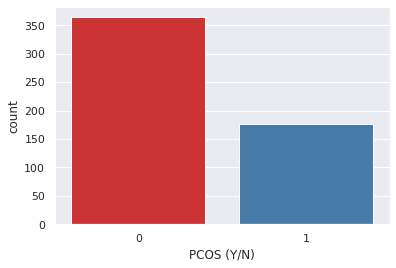

In [ ]:
# distribution of pcos
sns.set()
sns.countplot(df['PCOS (Y/N)'],palette="Set1")

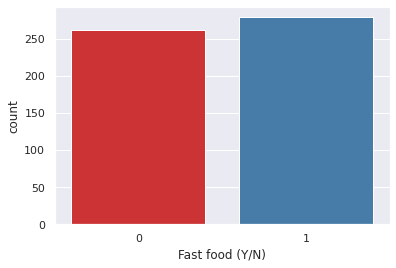

In [ ]:
sns.countplot(df['Fast food (Y/N)'],palette="Set1")

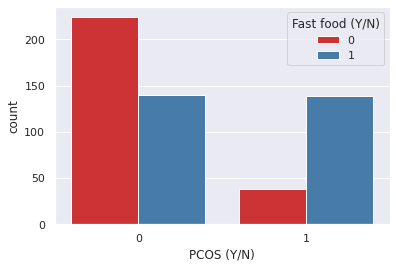

In [ ]:
sns.countplot(x ='PCOS (Y/N)', hue = "Fast food (Y/N)", data = df,palette="Set1")

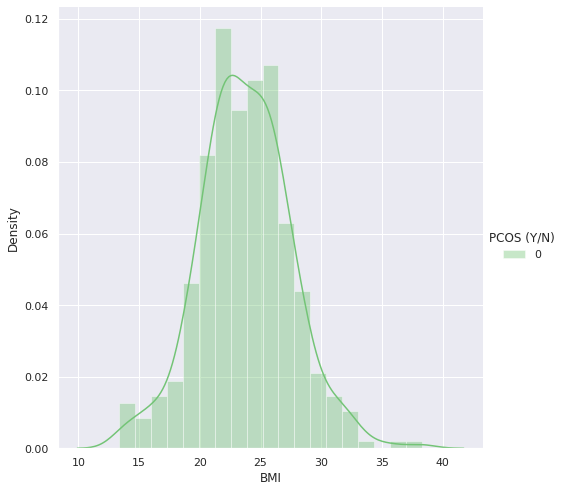

In [ ]:
sns.set_style()
sns.FacetGrid(p0,hue='PCOS (Y/N)',size=7,palette="Greens").map(sns.distplot,'BMI').add_legend()

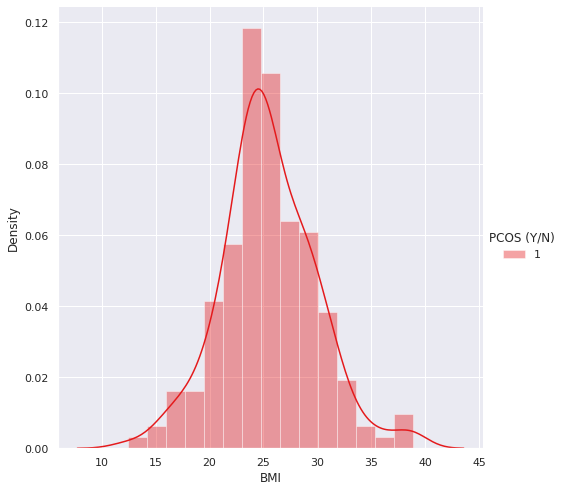

In [ ]:
sns.set_style()
sns.FacetGrid(p1,hue='PCOS (Y/N)',size=7,palette="Set1").map(sns.distplot,'BMI').add_legend()

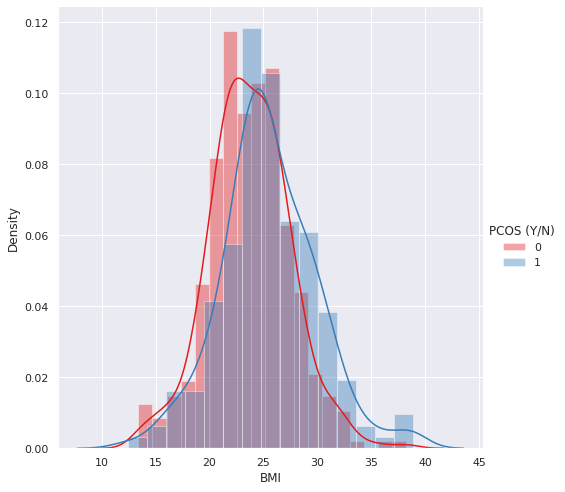

In [ ]:
sns.set_style()
sns.FacetGrid(df,hue='PCOS (Y/N)',size=7,palette="Set1").map(sns.distplot,'BMI').add_legend()

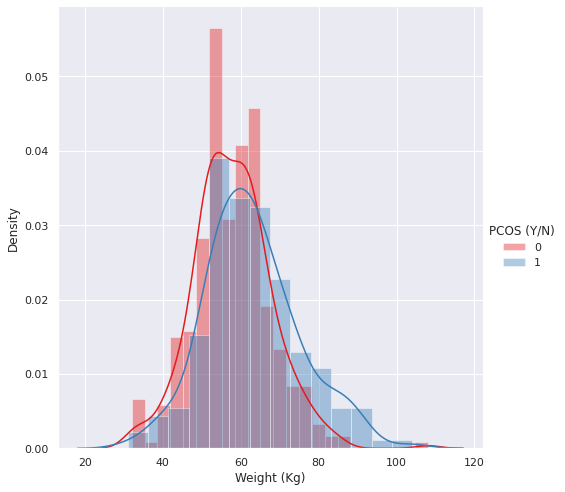

In [ ]:
sns.FacetGrid(df,hue='PCOS (Y/N)',size=7,palette="Set1").map(sns.distplot,'Weight (Kg)').add_legend()

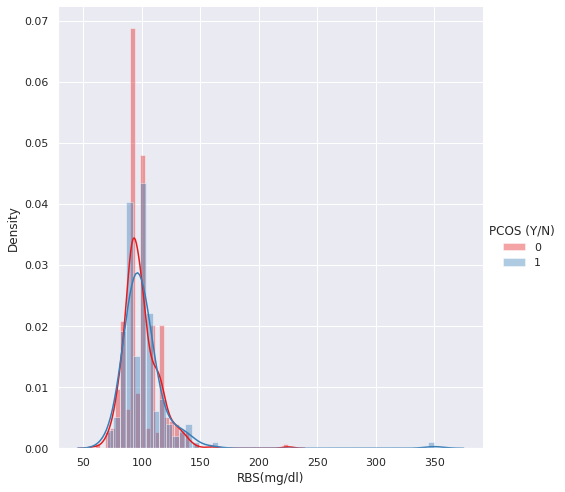

In [ ]:
sns.FacetGrid(df,hue='PCOS (Y/N)',size=7,palette="Set1").map(sns.distplot,'RBS(mg/dl)').add_legend()

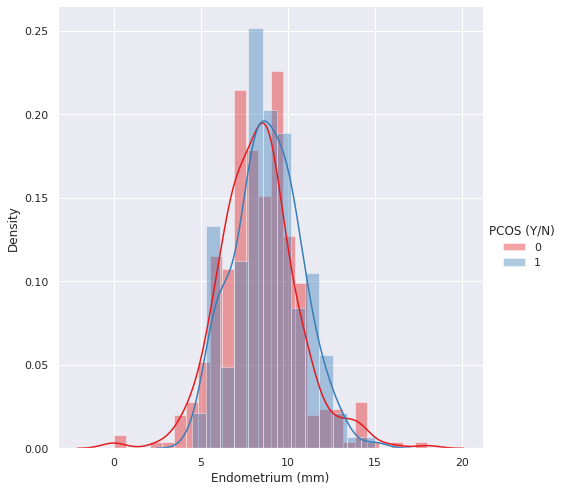

In [ ]:
sns.set_style()
sns.FacetGrid(df,hue='PCOS (Y/N)',size=7,palette="Set1").map(sns.distplot,'Endometrium (mm)').add_legend()

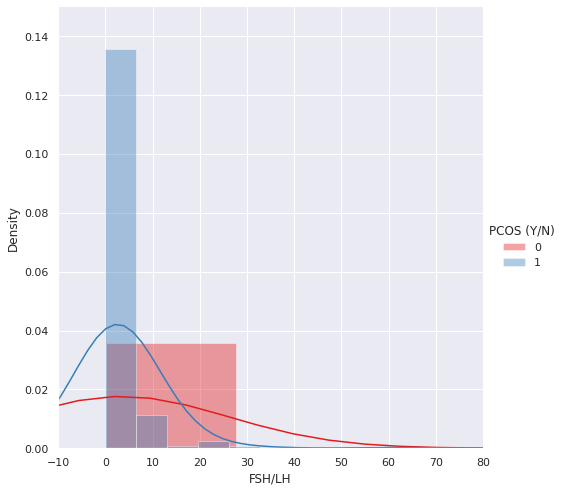

In [ ]:
b_plot=sns.FacetGrid(df,hue='PCOS (Y/N)',size=7,palette="Set1").map(sns.distplot,'FSH/LH').add_legend()
b_plot.set(xlim=(-10,80))
b_plot.set(ylim=(0,0.150))

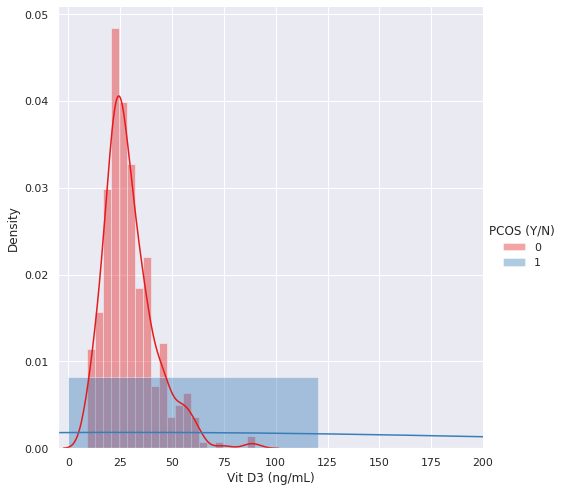

In [ ]:
a_plot=sns.FacetGrid(df,hue='PCOS (Y/N)',size=7,palette="Set1").map(sns.distplot,'Vit D3 (ng/mL)' ).add_legend()
a_plot.set(xlim=(-5,200))


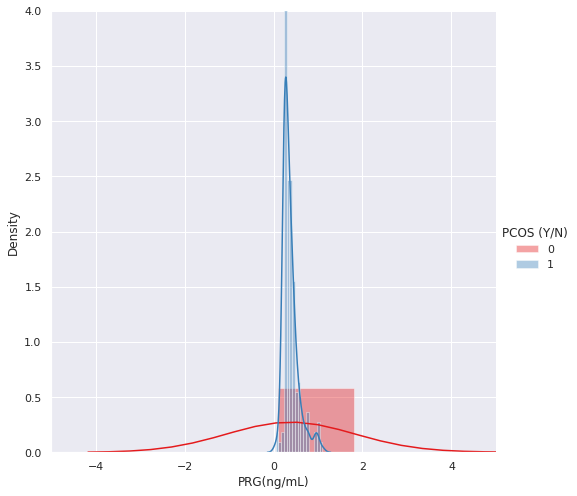

In [ ]:
sns.FacetGrid(df,hue='PCOS (Y/N)',size=7,palette="Set1").map(sns.distplot,'PRG(ng/mL)' ).add_legend().set(xlim=(-5,5)).set(ylim=(0,4))

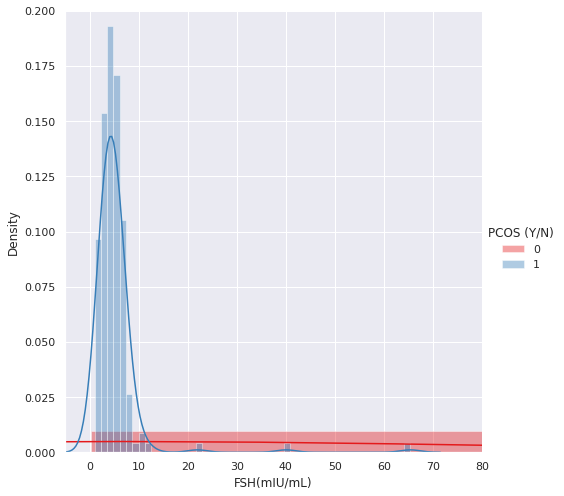

In [ ]:
b_plot=sns.FacetGrid(df,hue='PCOS (Y/N)',size=7,palette="Set1").map(sns.distplot,'FSH(mIU/mL)').add_legend()
b_plot.set(xlim=(-5,80))
b_plot.set(ylim=(0,0.20))

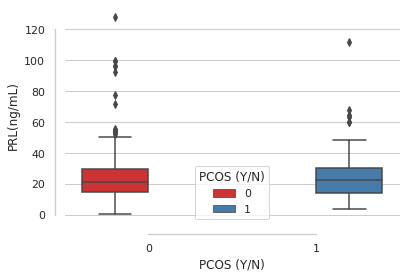

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")
sns.boxplot(y="PRL(ng/mL)", x="PCOS (Y/N)",
            hue="PCOS (Y/N)",palette="Set1",
            data=df)
sns.despine(offset=10, trim=True)

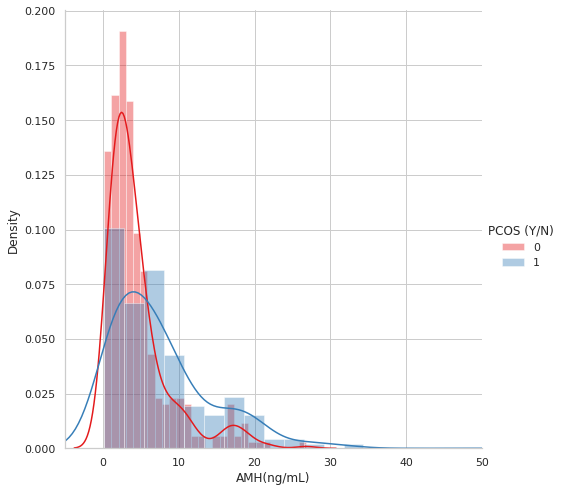

In [ ]:
sns.FacetGrid(df,hue='PCOS (Y/N)',size=7,palette="Set1").map(sns.distplot,'AMH(ng/mL)' ).add_legend().set(xlim=(-5,50))

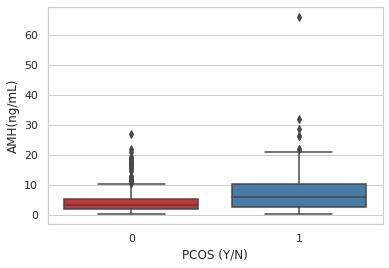

In [ ]:
sns.boxplot(data=df, y='AMH(ng/mL)',x='PCOS (Y/N)',palette="Set1")

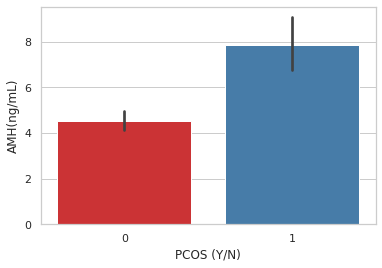

In [ ]:
sns.barplot(data=df,x="PCOS (Y/N)",y="AMH(ng/mL)",palette="Set1")

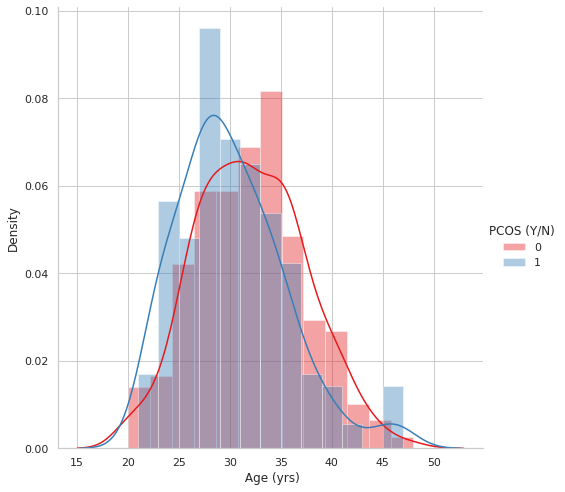

In [ ]:
sns.FacetGrid(df,hue='PCOS (Y/N)',size=7,palette="Set1").map(sns.distplot,' Age (yrs)').add_legend()

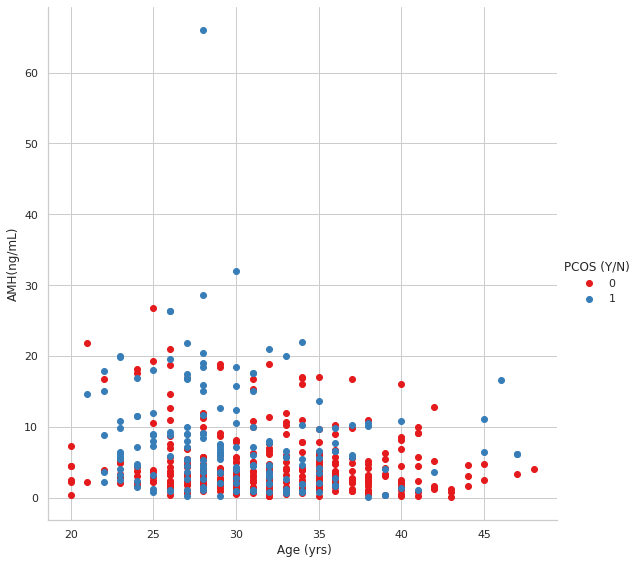

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="PCOS (Y/N)", size=8,palette="Set1") \
   .map(plt.scatter, " Age (yrs)","AMH(ng/mL)") \
   .add_legend()
plt.show()

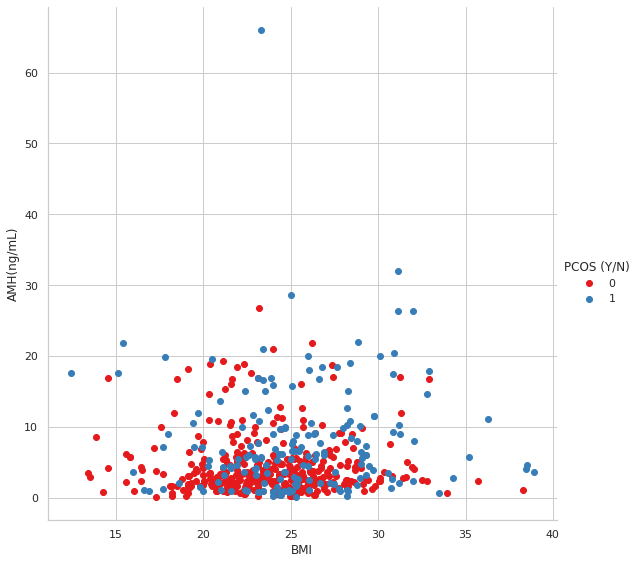

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="PCOS (Y/N)", size=8,palette="Set1") \
   .map(plt.scatter, "BMI","AMH(ng/mL)") \
   .add_legend()
plt.show()

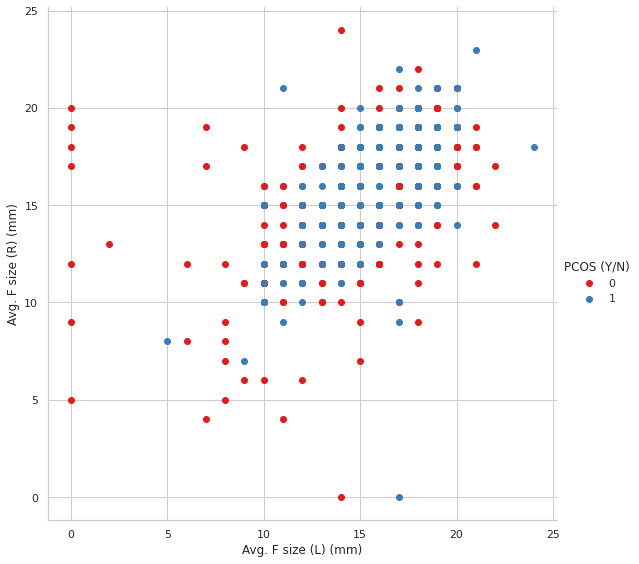

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="PCOS (Y/N)", size=8,palette="Set1") \
   .map(plt.scatter, "Avg. F size (L) (mm)", "Avg. F size (R) (mm)") \
   .add_legend()
plt.show()

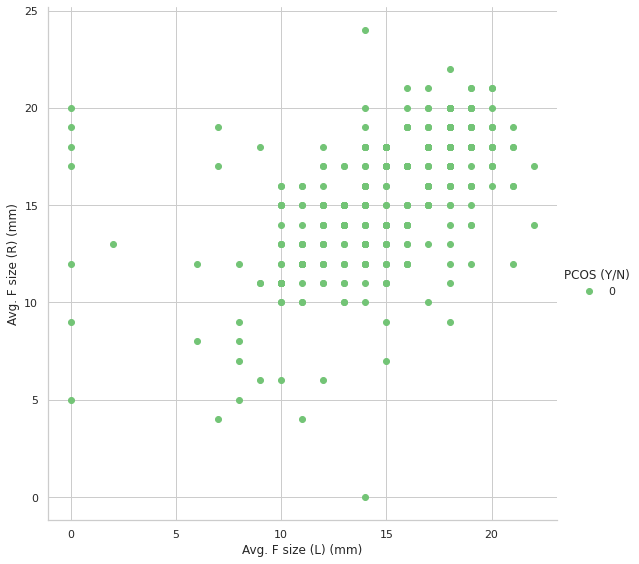

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(p0, hue="PCOS (Y/N)", size=8,palette="Greens") \
   .map(plt.scatter, "Avg. F size (L) (mm)", "Avg. F size (R) (mm)") \
   .add_legend()
plt.show()

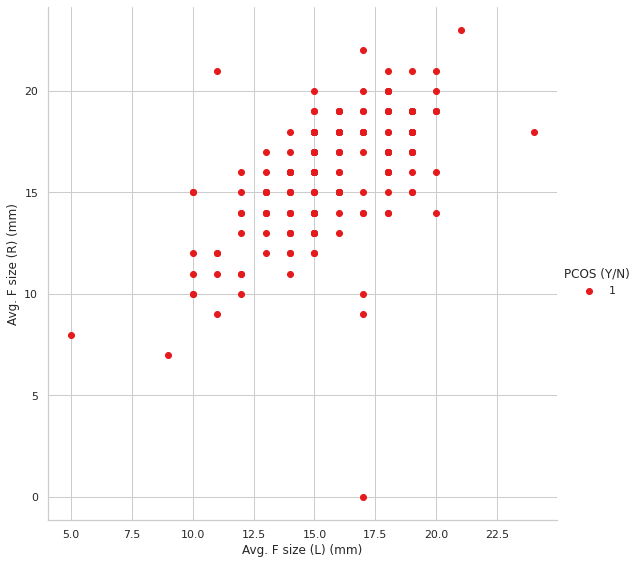

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(p1, hue="PCOS (Y/N)", size=8,palette="Set1") \
   .map(plt.scatter, "Avg. F size (L) (mm)", "Avg. F size (R) (mm)") \
   .add_legend()
plt.show()

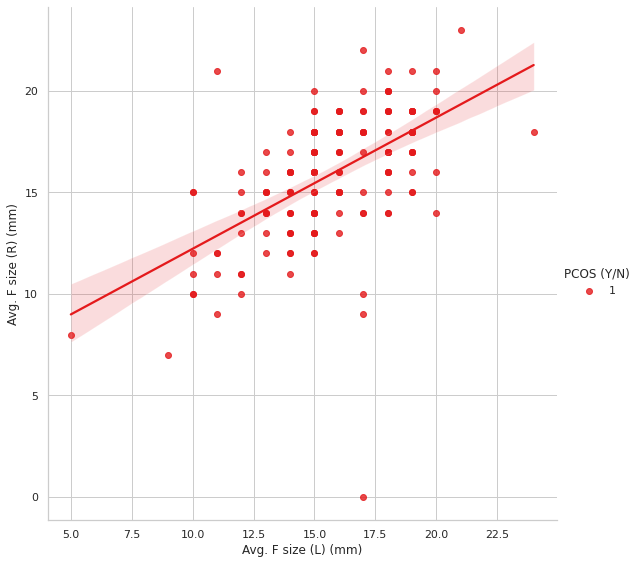

In [ ]:
sns.lmplot(data=p1, x="Avg. F size (L) (mm)",y="Avg. F size (R) (mm)",size=8,hue="PCOS (Y/N)",palette='Set1')

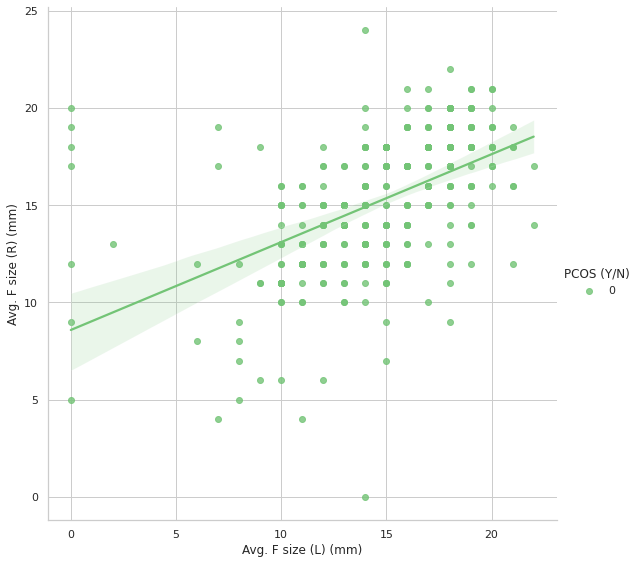

In [ ]:
sns.lmplot(data=p0, x="Avg. F size (L) (mm)",y="Avg. F size (R) (mm)",size=8,hue="PCOS (Y/N)",palette='Greens')

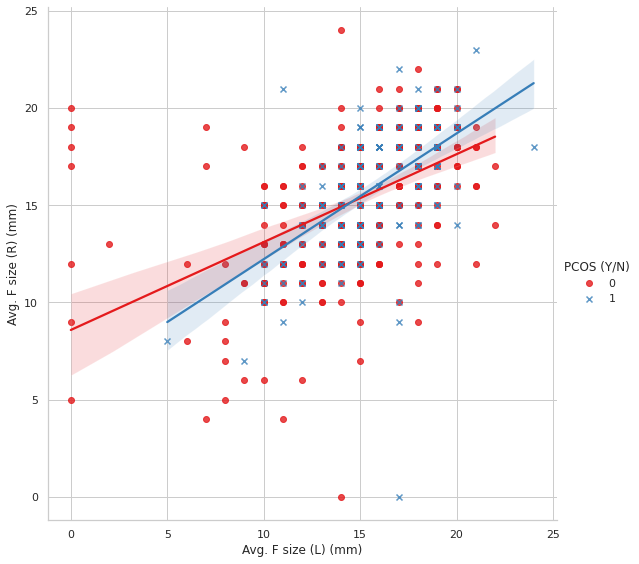

In [ ]:
sns.lmplot(data=df, x="Avg. F size (L) (mm)",y="Avg. F size (R) (mm)",size=8,hue="PCOS (Y/N)",palette='Set1',markers=["o","x"])

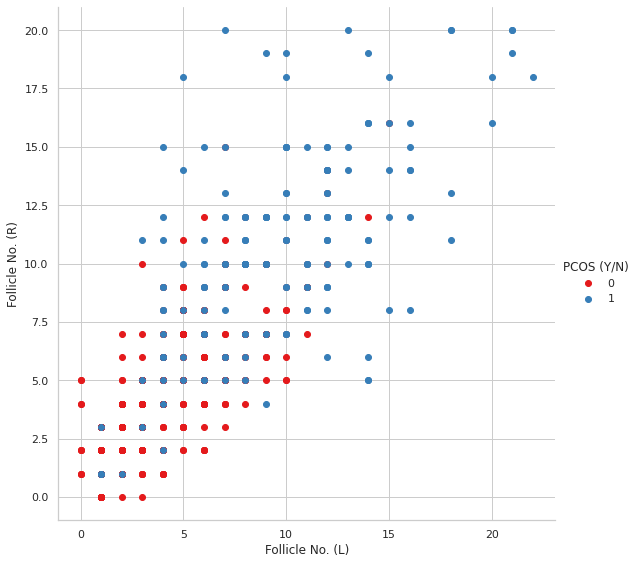

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="PCOS (Y/N)", size=8,palette="Set1").map(plt.scatter, "Follicle No. (L)", "Follicle No. (R)") .add_legend()
plt.show()

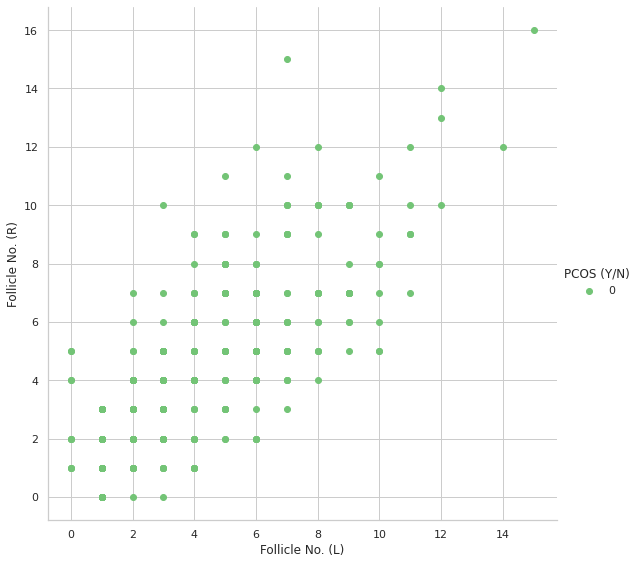

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(p0, hue="PCOS (Y/N)", size=8,palette="Greens").map(plt.scatter, "Follicle No. (L)", "Follicle No. (R)") .add_legend()
plt.show()

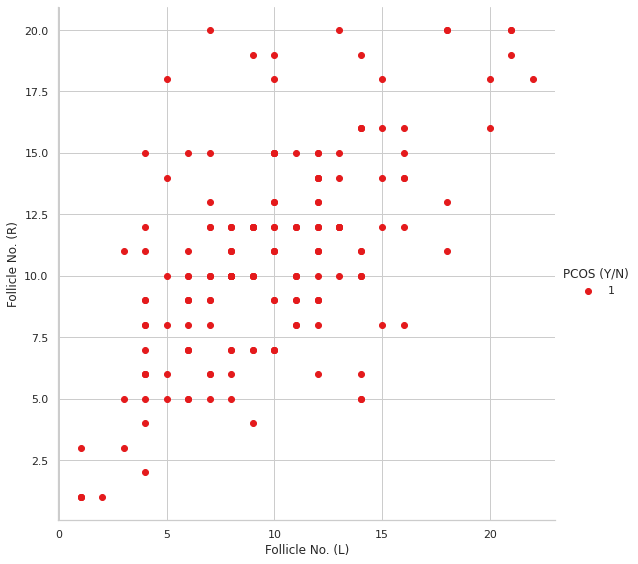

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(p1, hue="PCOS (Y/N)", size=8,palette="Set1").map(plt.scatter, "Follicle No. (L)", "Follicle No. (R)") .add_legend()
plt.show()

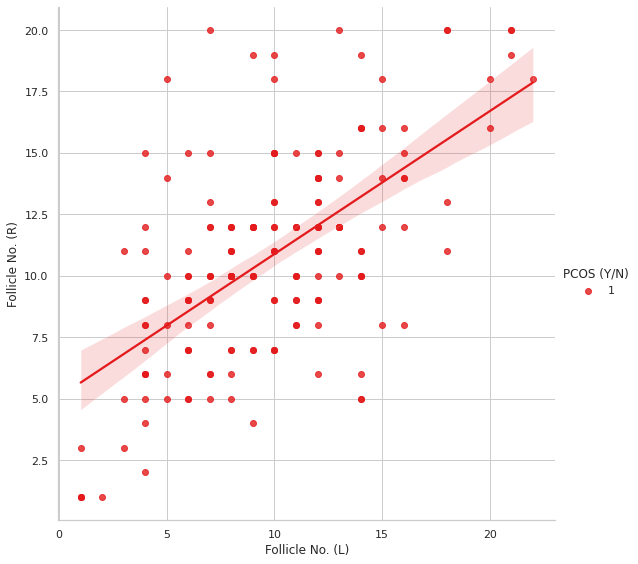

In [ ]:
sns.lmplot(data=p1, x="Follicle No. (L)",y="Follicle No. (R)",size=8,hue="PCOS (Y/N)",palette='Set1')

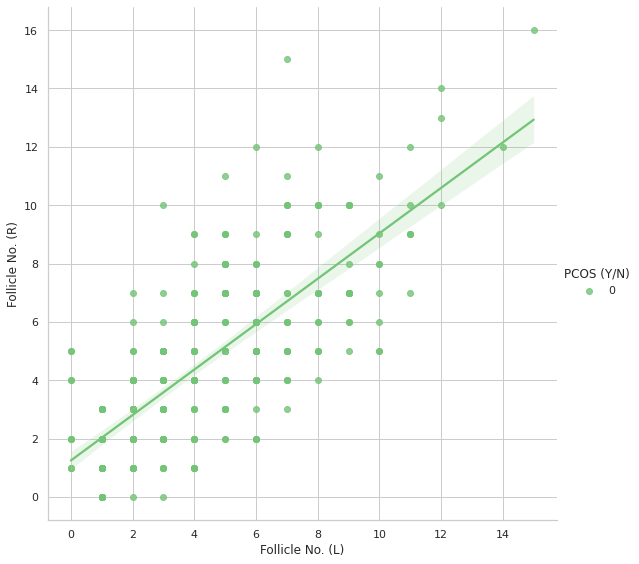

In [ ]:
sns.lmplot(data=p0, x="Follicle No. (L)",y="Follicle No. (R)",size=8,hue="PCOS (Y/N)",palette='Greens')

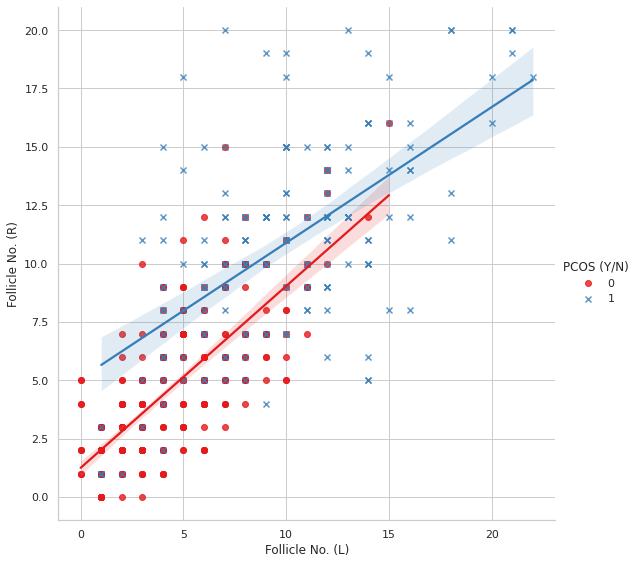

In [ ]:
sns.lmplot(data=df, x="Follicle No. (L)",y="Follicle No. (R)",size=8,hue="PCOS (Y/N)",palette='Set1',markers=["o","x"])

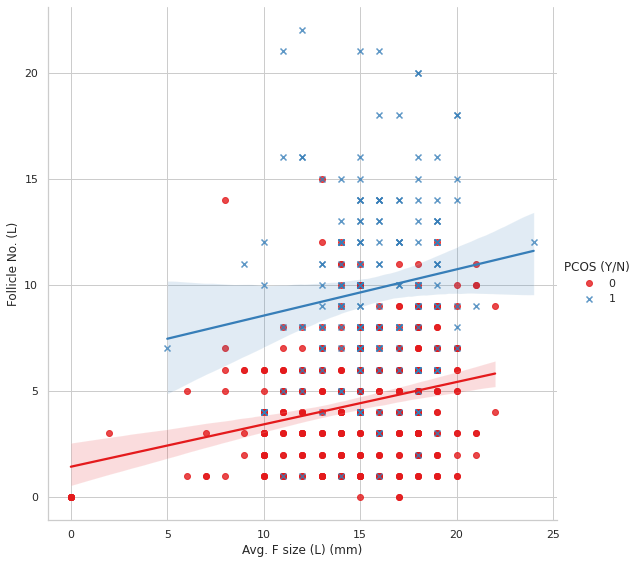

In [ ]:
sns.lmplot(data=df, x="Avg. F size (L) (mm)",y="Follicle No. (L)",size=8,hue="PCOS (Y/N)",palette='Set1',markers=["o","x"])

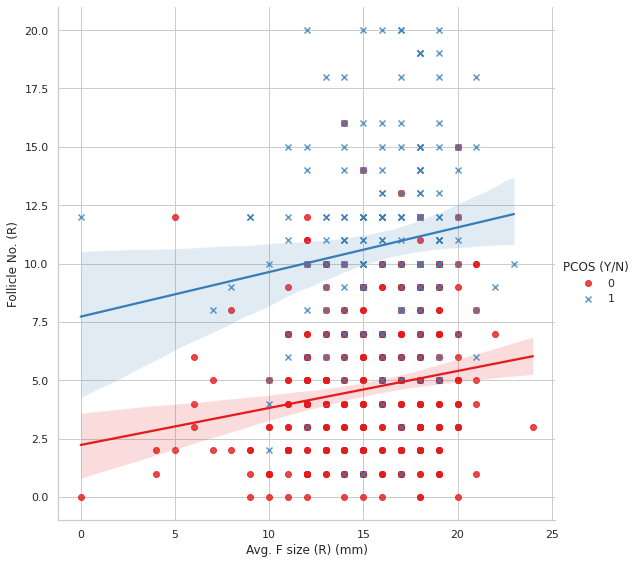

In [ ]:
sns.lmplot(data=df, x="Avg. F size (R) (mm)",y="Follicle No. (R)",size=8,hue="PCOS (Y/N)",palette='Set1',markers=["o","x"])

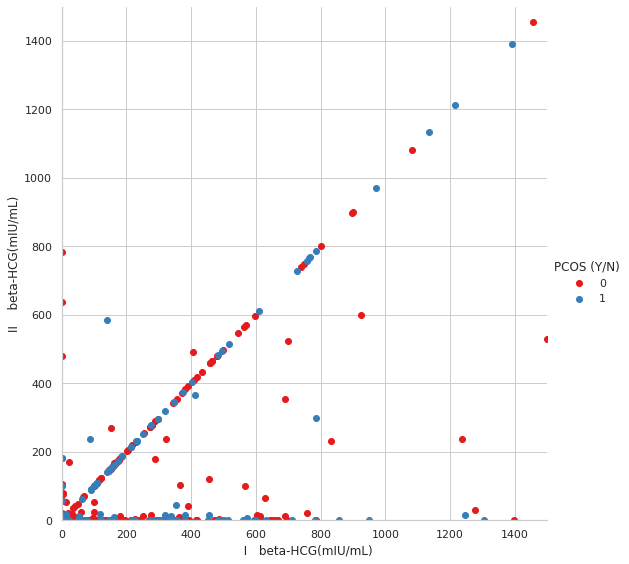

In [ ]:
sns.set_style("whitegrid")
c_plot=sns.FacetGrid(df, hue="PCOS (Y/N)", size=8,palette="Set1") \
   .map(plt.scatter, "  I   beta-HCG(mIU/mL)", "II    beta-HCG(mIU/mL)") \
   .add_legend()
c_plot.set(xlim=(0,1500))
c_plot.set(ylim=(0,1500))
plt.show()

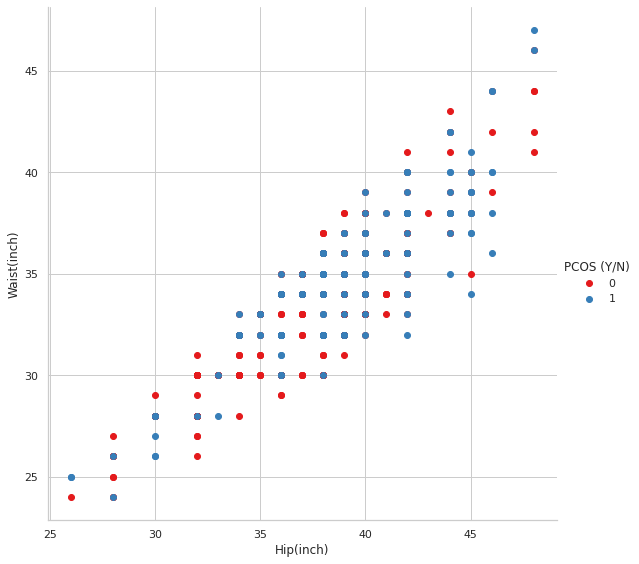

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="PCOS (Y/N)", size=8,palette="Set1") \
   .map(plt.scatter, "Hip(inch)", "Waist(inch)") \
   .add_legend()
plt.show()

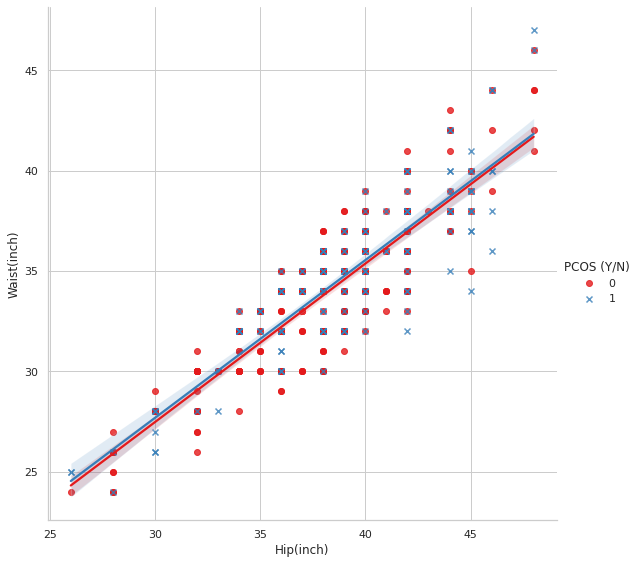

In [ ]:
sns.lmplot(data=df, x="Hip(inch)",y="Waist(inch)",size=8,hue="PCOS (Y/N)",palette='Set1',markers=["o","x"])

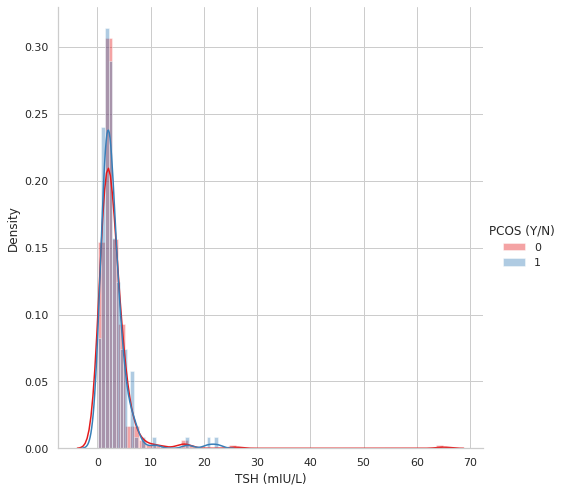

In [ ]:
sns.FacetGrid(df,hue='PCOS (Y/N)',size=7,palette="Set1").map(sns.distplot,'TSH (mIU/L)').add_legend()#.set(xlim=(0,40))

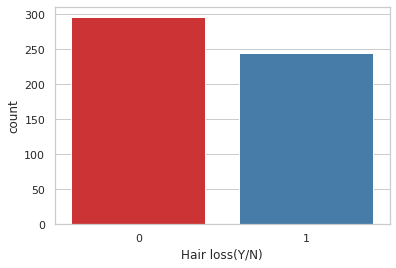

In [ ]:
sns.countplot(df['Hair loss(Y/N)'],palette="Set1")

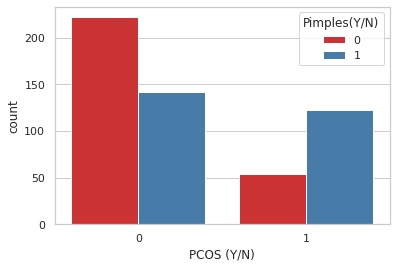

In [ ]:
sns.countplot(x ='PCOS (Y/N)', hue = "Pimples(Y/N)", data = df,palette="Set1")

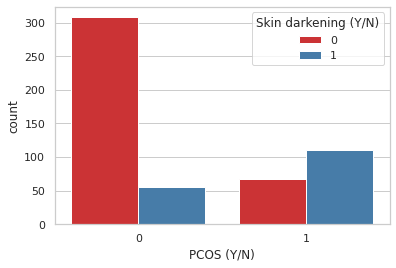

In [ ]:
sns.countplot(x ='PCOS (Y/N)', hue = "Skin darkening (Y/N)", data = df,palette="Set1")

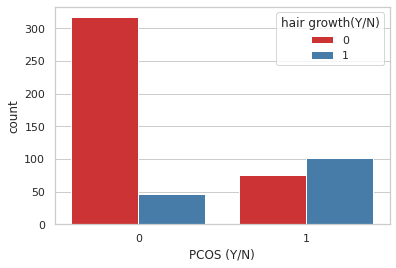

In [ ]:
sns.countplot(x ='PCOS (Y/N)', hue = "hair growth(Y/N)", data = df,palette="Set1")

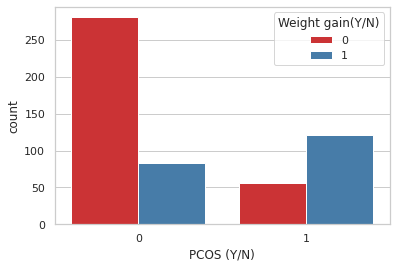

In [ ]:
sns.countplot(x ='PCOS (Y/N)', hue = "Weight gain(Y/N)", data = df,palette="Set1")

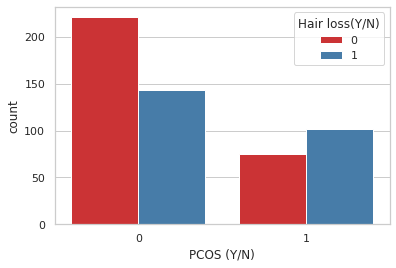

In [ ]:
sns.countplot(x ='PCOS (Y/N)', hue = "Hair loss(Y/N)", data = df,palette="Set1")

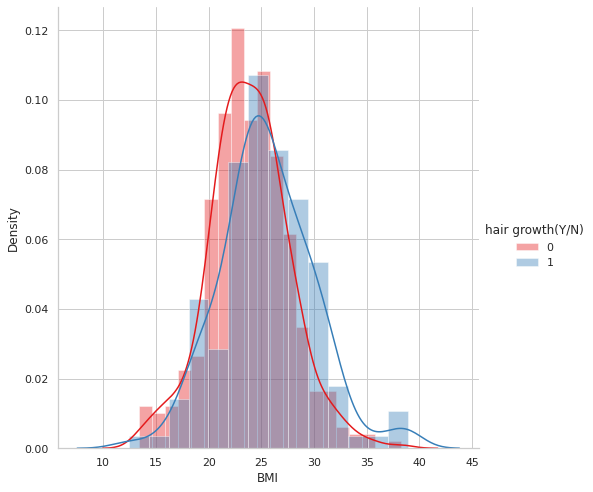

In [ ]:
sns.FacetGrid(df,hue='hair growth(Y/N)',size=7,palette="Set1").map(sns.distplot,'BMI').add_legend()

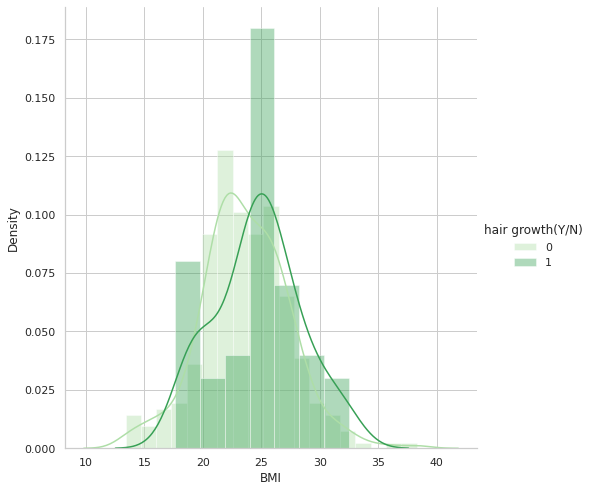

In [ ]:
sns.FacetGrid(p0,hue='hair growth(Y/N)',size=7,palette="Greens").map(sns.distplot,'BMI').add_legend()

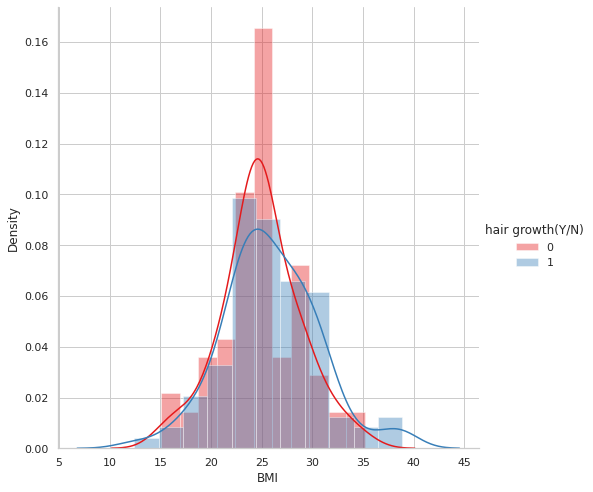

In [ ]:
sns.FacetGrid(p1,hue='hair growth(Y/N)',size=7,palette="Set1").map(sns.distplot,'BMI').add_legend()

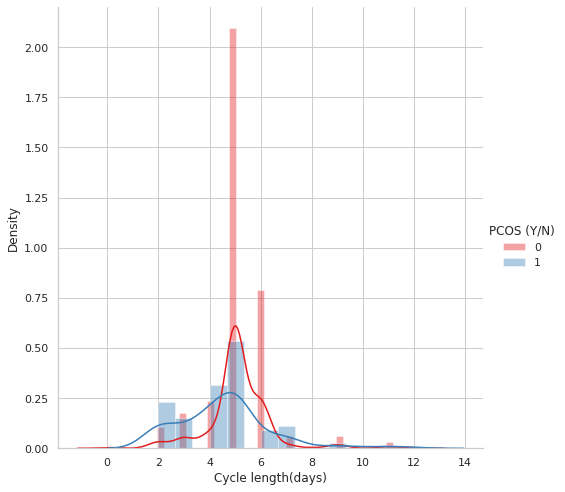

In [ ]:
sns.FacetGrid(df,hue='PCOS (Y/N)',size=7,palette="Set1").map(sns.distplot,'Cycle length(days)').add_legend()

In [ ]:
# grouping the data based on the target variable
df.groupby('PCOS (Y/N)').mean()

,Sl. No,Patient File No.,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
PCOS (Y/N),,,,,,,,,,,,,,,,,,,,,
0,264.357143,264.357143,32.065934,57.939560,156.156593,23.747397,13.755495,72.964286,19.200549,11.107390,...,0.390110,0.384615,0.228022,114.620879,76.780220,4.351648,4.637363,14.667582,15.214286,8.315027
1,284.661017,284.661017,30.124294,62.920904,157.045198,25.470919,13.898305,73.830508,19.333333,11.268305,...,0.694915,0.785311,0.288136,114.745763,77.231638,9.785311,10.762712,15.689266,15.903955,8.806780


In [ ]:
#splitting
X=df.drop(["PCOS (Y/N)","Sl. No","Patient File No.","Unnamed: 44"],axis = 1)
Y=df["PCOS (Y/N)"]

In [ ]:
print (X), print (Y)

      Age (yrs)  Weight (Kg)  Height(Cm)         BMI  Blood Group  \
0            28           44          152  19.300000           15   
1            36           65          161  24.921163           15   
2            33           68          165  25.270891           11   
3            37           65          148  29.674945           13   
4            25           52          161  20.060954           11   
..          ...          ...          ...        ...          ...   
536          35           50          164  18.500000           17   
537          30           63          158  25.300000           15   
538          36           54          152  23.400000           13   
539          27           50          150  22.200000           15   
540          23           82          165  30.100000           13   

     Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  \
0                  78                22     10.48           2   
1                  74                20  

(None, None)

# Univariate Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [ ]:
### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=41)
ordered_feature=ordered_rank_features.fit(X,Y)

In [ ]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

In [ ]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [ ]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,Age (yrs),14.284370
1,Weight (Kg),49.607547
2,Height(Cm),0.601071
3,BMI,14.551345
4,Blood Group,0.175974
5,Pulse rate(bpm),1.219952
6,RR (breaths/min),0.109112
7,Hb(g/dl),0.276315
8,Cycle(R/I),27.681419
9,Cycle length(days),7.750342


In [ ]:
#features_rank.nlargest(24,'Score')

In [ ]:
#features_rank.nlargest(20,'Score')

In [ ]:
#features_rank.nlargest(14,'Score')

In [ ]:
features_rank.nlargest(13,'Score')

,Features,Score
24,Vit D3 (ng/mL),9477.648952
13,I beta-HCG(mIU/mL),6950.525631
16,LH(mIU/mL),2558.471157
15,FSH(mIU/mL),1601.145511
14,II beta-HCG(mIU/mL),949.362075
37,Follicle No. (R),672.789402
36,Follicle No. (L),573.647927
22,AMH(ng/mL),232.747856
17,FSH/LH,96.852985
29,Skin darkening (Y/N),84.870716


below is the code for 24 features

In [ ]:
#splitting
#X=df.drop(["Pulse rate(bpm) ","Height(Cm) ","PCOS (Y/N)","Sl. No","Patient File No.","Unnamed: 44","Blood Group","RR (breaths/min)","Hb(g/dl)","Pregnant(Y/N)","No. of aborptions","Waist(inch)","Waist:Hip Ratio","TSH (mIU/L)","PRL(ng/mL)","RBS(mg/dl)","Reg.Exercise(Y/N)","BP _Systolic (mmHg)","BP _Diastolic (mmHg)","Avg. F size (R) (mm)","Endometrium (mm)"],axis=1)

the below code is for univariate 20 features (please comment out other while using single split)

In [ ]:
#splitting
#X=df.drop(["Pulse rate(bpm) ","Height(Cm) ","PCOS (Y/N)","Sl. No","Patient File No.","Unnamed: 44","Blood Group","RR (breaths/min)","Hb(g/dl)","Cycle length(days)","Pregnant(Y/N)","No. of aborptions","Hip(inch)","Waist(inch)","Waist:Hip Ratio","TSH (mIU/L)","PRL(ng/mL)","RBS(mg/dl)","Hair loss(Y/N)","Reg.Exercise(Y/N)","BP _Systolic (mmHg)","BP _Diastolic (mmHg)","Avg. F size (L) (mm)","Avg. F size (R) (mm)","Endometrium (mm)"],axis=1)

below is the code for 14 features

In [ ]:
#splitting
#X=df.drop(["Pulse rate(bpm) ","Height(Cm) ","PCOS (Y/N)","Sl. No","Patient File No.","Unnamed: 44","Blood Group","RR (breaths/min)","Hb(g/dl)","Cycle length(days)","Pregnant(Y/N)","No. of aborptions","Hip(inch)","Waist(inch)","Waist:Hip Ratio","TSH (mIU/L)","PRL(ng/mL)","RBS(mg/dl)","Hair loss(Y/N)","Reg.Exercise(Y/N)","BP _Systolic (mmHg)","BMI"," Age (yrs)","Marraige Status (Yrs)","Pimples(Y/N)","PRG(ng/mL)","Cycle(R/I)","BP _Diastolic (mmHg)","Avg. F size (L) (mm)","Avg. F size (R) (mm)","Endometrium (mm)"],axis=1)

below is the code for 13 features


In [ ]:
#splitting
#X=df.drop(["Pulse rate(bpm) ","Height(Cm) ","PCOS (Y/N)","Sl. No","Patient File No.","Unnamed: 44","Blood Group","RR (breaths/min)","Hb(g/dl)","Cycle length(days)","Pregnant(Y/N)","No. of aborptions","Hip(inch)","Waist(inch)","Waist:Hip Ratio","TSH (mIU/L)","PRL(ng/mL)","RBS(mg/dl)","Hair loss(Y/N)","Reg.Exercise(Y/N)","BP _Systolic (mmHg)","BMI"," Age (yrs)","Marraige Status (Yrs)","Pimples(Y/N)","PRG(ng/mL)","Cycle(R/I)","BP _Diastolic (mmHg)","Avg. F size (L) (mm)","Avg. F size (R) (mm)","Endometrium (mm)","Fast food (Y/N)"],axis=1)

below is the code for 12 features

In [ ]:
#splitting

#X=df.drop(["Pulse rate(bpm) ","Height(Cm) ","PCOS (Y/N)","Sl. No","Patient File No.","Unnamed: 44","Weight (Kg)","Blood Group","RR (breaths/min)","Hb(g/dl)","Cycle length(days)","Pregnant(Y/N)","No. of aborptions","Hip(inch)","Waist(inch)","Waist:Hip Ratio","TSH (mIU/L)","PRL(ng/mL)","RBS(mg/dl)","Hair loss(Y/N)","Reg.Exercise(Y/N)","BP _Systolic (mmHg)","BMI"," Age (yrs)","Marraige Status (Yrs)","Pimples(Y/N)","PRG(ng/mL)","Cycle(R/I)","BP _Diastolic (mmHg)","Avg. F size (L) (mm)","Avg. F size (R) (mm)","Endometrium (mm)","Fast food (Y/N)"],axis=1)

below is the code for 11 features

In [ ]:
#splitting

X=df.drop(["Pulse rate(bpm) ","Height(Cm) ","PCOS (Y/N)","Sl. No","Patient File No.","Unnamed: 44","Weight (Kg)","Weight gain(Y/N)","Blood Group","RR (breaths/min)","Hb(g/dl)","Cycle length(days)","Pregnant(Y/N)","No. of aborptions","Hip(inch)","Waist(inch)","Waist:Hip Ratio","TSH (mIU/L)","PRL(ng/mL)","RBS(mg/dl)","Hair loss(Y/N)","Reg.Exercise(Y/N)","BP _Systolic (mmHg)","BMI"," Age (yrs)","Marraige Status (Yrs)","Pimples(Y/N)","PRG(ng/mL)","Cycle(R/I)","BP _Diastolic (mmHg)","Avg. F size (L) (mm)","Avg. F size (R) (mm)","Endometrium (mm)","Fast food (Y/N)"],axis=1)

below is the code for 10 features




In [ ]:
#splitting
#X=df.drop(["Pulse rate(bpm) ","Height(Cm) ","PCOS (Y/N)","Sl. No","Patient File No.","Unnamed: 44","Fast food (Y/N)","Weight (Kg)","Weight gain(Y/N)","hair growth(Y/N)","Blood Group","RR (breaths/min)","Hb(g/dl)","Cycle length(days)","Pregnant(Y/N)","No. of aborptions","Hip(inch)","Waist(inch)","Waist:Hip Ratio","TSH (mIU/L)","PRL(ng/mL)","RBS(mg/dl)","Hair loss(Y/N)","Reg.Exercise(Y/N)","BP _Systolic (mmHg)","BMI"," Age (yrs)","Marraige Status (Yrs)","Pimples(Y/N)","PRG(ng/mL)","Cycle(R/I)","BP _Diastolic (mmHg)","Avg. F size (L) (mm)","Avg. F size (R) (mm)","Endometrium (mm)"],axis=1)

# Train, Test and Split

In [ ]:
#train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.15, stratify=Y, random_state=3000)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(541, 11) (459, 11) (82, 11)


In [ ]:
X.var()

  I   beta-HCG(mIU/mL)    1.121527e+07
II    beta-HCG(mIU/mL)    2.572257e+06
FSH(mIU/mL)               4.709858e+04
LH(mIU/mL)                7.512253e+03
FSH/LH                    3.683497e+03
AMH(ng/mL)                3.456878e+01
Vit D3 (ng/mL)            1.198590e+05
hair growth(Y/N)          1.990963e-01
Skin darkening (Y/N)      2.130828e-01
Follicle No. (L)          1.788693e+01
Follicle No. (R)          1.968599e+01
dtype: float64

In [ ]:
Y.var()

0.2205380981721093

# CATBooster Classifier

In [ ]:
features = list(X_train.columns)

In [ ]:
model_cb = CatBoostClassifier(task_type='GPU',iterations=20,random_state=2021,eval_metric="F1")

In [ ]:
from sklearn.model_selection import KFold
kfold_validation=KFold(10)

In [ ]:
model_cb.fit(X_train, Y_train, plot=True,eval_set=(X_test,Y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.384277
0:	learn: 0.7985348	test: 0.8163265	best: 0.8163265 (0)	total: 9.55ms	remaining: 181ms
1:	learn: 0.8450704	test: 0.8979592	best: 0.8979592 (1)	total: 16ms	remaining: 144ms
2:	learn: 0.8218182	test: 0.8510638	best: 0.8979592 (1)	total: 22.8ms	remaining: 129ms
3:	learn: 0.8333333	test: 0.8979592	best: 0.8979592 (1)	total: 29.5ms	remaining: 118ms
4:	learn: 0.8256228	test: 0.8979592	best: 0.8979592 (1)	total: 37.5ms	remaining: 113ms
5:	learn: 0.8551237	test: 0.9411765	best: 0.9411765 (5)	total: 44.5ms	remaining: 104ms
6:	learn: 0.8510638	test: 0.9200000	best: 0.9411765 (5)	total: 52.6ms	remaining: 97.7ms
7:	learn: 0.8719723	test: 0.9200000	best: 0.9411765 (5)	total: 61.6ms	remaining: 92.4ms
8:	learn: 0.8750000	test: 0.9230769	best: 0.9411765 (5)	total: 69.4ms	remaining: 84.8ms
9:	learn: 0.8780488	test: 0.9230769	best: 0.9411765 (5)	total: 77.4ms	remaining: 77.4ms
10:	learn: 0.8780488	test: 0.9230769	best: 0.9411765 (5)	total: 84.9ms	remaining: 69.5ms
11:	learn

In [ ]:
#Accuracy Score of training data for Cat Boost

X_train_prediction=model_cb.predict(X_train)
Training_data_Accuracy=accuracy_score(X_train_prediction, Y_train)
print('Accuracy of Training Data:',Training_data_Accuracy)

Accuracy of Training Data: 0.9106753812636166


In [ ]:
#Accuracy Score of testing data for Cat Boost

X_test_prediction=model_cb.predict(X_test)
Testing_data_Accuracy=accuracy_score(X_test_prediction, Y_test)
print('Accuracy of Testing Data:',Testing_data_Accuracy)

Accuracy of Testing Data: 0.9634146341463414


In [ ]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(model_cb,X_train,Y_train,cv=kfold_validation)
print(results)
print(np.mean(results))

Learning rate set to 0.5
0:	learn: 0.8142292	total: 4.6ms	remaining: 87.3ms
1:	learn: 0.8458498	total: 8.05ms	remaining: 72.4ms
2:	learn: 0.8594378	total: 11.5ms	remaining: 65.3ms
3:	learn: 0.8685259	total: 14.9ms	remaining: 59.7ms
4:	learn: 0.8897638	total: 18.5ms	remaining: 55.4ms
5:	learn: 0.8828125	total: 21.8ms	remaining: 50.9ms
6:	learn: 0.8695652	total: 25ms	remaining: 46.4ms
7:	learn: 0.8968254	total: 28.4ms	remaining: 42.5ms
8:	learn: 0.9055118	total: 31.7ms	remaining: 38.7ms
9:	learn: 0.9140625	total: 35ms	remaining: 35ms
10:	learn: 0.9133858	total: 38.3ms	remaining: 31.4ms
11:	learn: 0.9176471	total: 41.7ms	remaining: 27.8ms
12:	learn: 0.9140625	total: 45.1ms	remaining: 24.3ms
13:	learn: 0.9140625	total: 48.4ms	remaining: 20.8ms
14:	learn: 0.9224806	total: 51.6ms	remaining: 17.2ms
15:	learn: 0.9224806	total: 55.5ms	remaining: 13.9ms
16:	learn: 0.9296875	total: 58.7ms	remaining: 10.4ms
17:	learn: 0.9302326	total: 62.1ms	remaining: 6.89ms
18:	learn: 0.9260700	total: 65.3ms	rem

In [ ]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
scores=cross_val_score(model_cb,X_test,Y_test,cv=skfold)
print('Stratified Kfold accuracy for Catbooster = ',np.mean(scores))

Learning rate set to 0.5
0:	learn: 0.9565217	total: 4.57ms	remaining: 86.8ms
1:	learn: 0.9130435	total: 7.55ms	remaining: 68ms
2:	learn: 0.9333333	total: 11ms	remaining: 62.5ms
3:	learn: 0.9565217	total: 14.5ms	remaining: 58ms
4:	learn: 0.9565217	total: 17.8ms	remaining: 53.3ms
5:	learn: 0.9565217	total: 20.7ms	remaining: 48.2ms
6:	learn: 0.9565217	total: 24.2ms	remaining: 44.9ms
7:	learn: 0.9565217	total: 27.6ms	remaining: 41.4ms
8:	learn: 0.9565217	total: 30.8ms	remaining: 37.7ms
9:	learn: 0.9565217	total: 34.2ms	remaining: 34.2ms
10:	learn: 1.0000000	total: 37.7ms	remaining: 30.8ms
11:	learn: 1.0000000	total: 41.1ms	remaining: 27.4ms
12:	learn: 1.0000000	total: 44.6ms	remaining: 24ms
13:	learn: 1.0000000	total: 48ms	remaining: 20.6ms
14:	learn: 1.0000000	total: 51.5ms	remaining: 17.2ms
15:	learn: 1.0000000	total: 55ms	remaining: 13.8ms
16:	learn: 1.0000000	total: 58.3ms	remaining: 10.3ms
17:	learn: 1.0000000	total: 61.7ms	remaining: 6.85ms
18:	learn: 1.0000000	total: 64.9ms	remainin

In [ ]:
#Precision Score of training data for Cat Boost

X_train_prediction=model_cb.predict(X_train)
Training_data_Precision1o=precision_score(X_train_prediction, Y_train)
print('Precision of Training Data:',Training_data_Precision1o)

Precision of Training Data: 0.8066666666666666


In [ ]:
#Precision Score of testing data for Cat Boost

X_test_prediction=model_cb.predict(X_test)
Testing_data_Precision1o=precision_score(X_test_prediction, Y_test)
print('Precision of Testing Data:',Testing_data_Precision1o)

Precision of Testing Data: 0.8888888888888888


In [ ]:
#Recall_Score of training data for Cat Boost

X_train_prediction=model_cb.predict(X_train)
Training_data_recall=recall_score(X_train_prediction, Y_train)
print('Recall(sensitivity) of Training Data:',Training_data_recall)

Recall(sensitivity) of Training Data: 0.9097744360902256


In [ ]:
#Recall_Score of testing data for Cat Boost

X_test_prediction=model_cb.predict(X_test)
Testing_data_recall=recall_score(X_test_prediction, Y_test)
print('Recall(sensitivity) of Testing Data:',Testing_data_recall)

Recall(sensitivity) of Testing Data: 1.0


In [ ]:
#F1_Score of training data for CATboost

X_train_prediction=model_cb.predict(X_train)
Training_data_F1=f1_score(X_train_prediction, Y_train)
print('F1_score of Training Data:',Training_data_F1)

F1_score of Training Data: 0.8551236749116607


In [ ]:
#F1_Score of testing data for CATboost

X_test_prediction=model_cb.predict(X_test)
Testing_data_F1=f1_score(X_test_prediction, Y_test)
print('F1_score of Testing Data:',Testing_data_F1)

F1_score of Testing Data: 0.9411764705882353


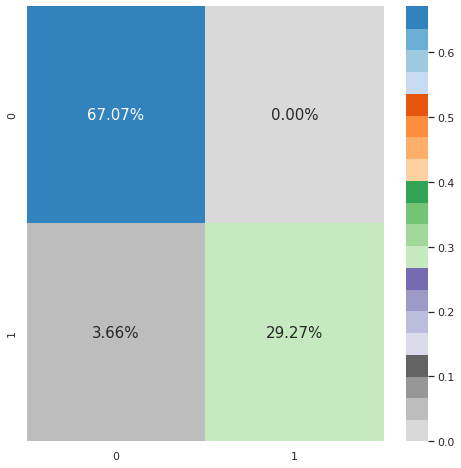

In [ ]:
plt.subplots(figsize=(8,8))
cf_matrix1 = confusion_matrix(Y_test,X_test_prediction )
sns.heatmap(cf_matrix1/np.sum(cf_matrix1),fmt='.2%',  annot = True, annot_kws = {'size':15}, cmap = 'tab20c_r')

# Logistic Regression

In [ ]:
#model training Logistic Regression
from sklearn.model_selection import KFold
model1=LogisticRegression()
kfold_validation=KFold(10)

In [ ]:
#Training
model1.fit(X_train, Y_train)

LogisticRegression()

K Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(model1,X,Y,cv=kfold_validation)
print(results)
print('K fold Cross val accuracy =',np.mean(results))

[0.78181818 0.77777778 0.77777778 0.83333333 0.75925926 0.7037037
 0.75925926 0.7037037  0.77777778 0.81481481]
K fold Cross val accuracy = 0.7689225589225589


Stratified K-Fold cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
scores=cross_val_score(model1,X_test,Y_test,cv=skfold)
print('Stratified K fold Cross val accuracy =',np.mean(scores))

Stratified K fold Cross val accuracy = 0.7897058823529411


Model Evaluation

In [ ]:
#Accuracy Score of training data for logistic regression

X_train_prediction=model1.predict(X_train)
Training_data_Accuracy1a=accuracy_score(X_train_prediction, Y_train)
print('Accuracy of Training Data:',Training_data_Accuracy1a)

Accuracy of Training Data: 0.7799564270152506


In [ ]:
#Accuracy Score of testing data for logistic regression

X_test_prediction=model1.predict(X_test)
Testing_data_Accuracy1b=accuracy_score(X_test_prediction, Y_test)
print('Accuracy of Testing Data:',Testing_data_Accuracy1b)

Accuracy of Testing Data: 0.7560975609756098


In [ ]:
#Precision Score of training data for logistic regression

X_train_prediction=model1.predict(X_train)
Training_data_Precision1a=precision_score(X_train_prediction, Y_train)
print('Precision of Training Data:',Training_data_Precision1a)

Precision of Training Data: 0.7066666666666667


In [ ]:
#Precision Score of testing data for logistic regression

X_test_prediction=model1.predict(X_test)
Testing_data_Precision1b=precision_score(X_test_prediction, Y_test)
print('Precision of Testing Data:',Testing_data_Precision1b)

Precision of Testing Data: 0.6666666666666666


In [ ]:
#Recall_Score of training data for logistic regression

X_train_prediction=model1.predict(X_train)
Training_data_recall=recall_score(X_train_prediction, Y_train)
print('Recall(sensitivity) of Training Data:',Training_data_recall)

Recall(sensitivity) of Training Data: 0.6503067484662577


In [ ]:
#Recall_Score of testing data for logistic regression

X_test_prediction=model1.predict(X_test)
Testing_data_recall=recall_score(X_test_prediction, Y_test)
print('Recall(sensitivity) of Testing Data:',Testing_data_recall)

Recall(sensitivity) of Testing Data: 0.6206896551724138


In [ ]:
#F1_Score of training data for logistic regression

X_train_prediction=model1.predict(X_train)
Training_data_F1=f1_score(X_train_prediction, Y_train)
print('F1_score of Training Data:',Training_data_F1)

F1_score of Training Data: 0.6773162939297125


In [ ]:
#F1_Score of testing data for logistic regression

X_test_prediction=model1.predict(X_test)
Testing_data_F1=f1_score(X_test_prediction, Y_test)
print('F1_score of Testing Data:',Testing_data_F1)

F1_score of Testing Data: 0.6428571428571429


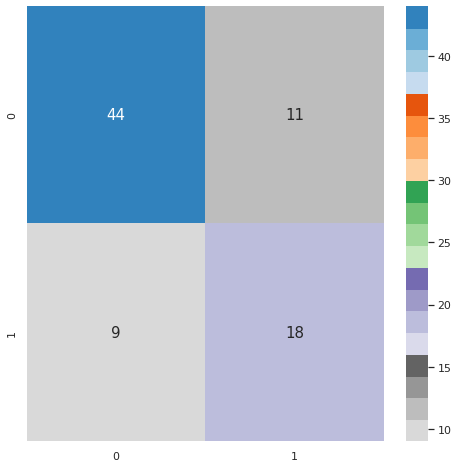

In [ ]:
plt.subplots(figsize=(8,8))
cf_matrix1 = confusion_matrix(Y_test,X_test_prediction )
sns.heatmap(cf_matrix1, annot = True, annot_kws = {'size':15}, cmap = 'tab20c_r')

# KNeighbours classifier

In [ ]:
#model training KNeighbours
from sklearn.model_selection import KFold
model2=KNeighborsClassifier(n_neighbors=50)
kfold_validation=KFold(10)

In [ ]:
#Training
model2.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=50)

In [ ]:
#Accuracy Score of training data for kneighbours

X_train_prediction=model2.predict(X_train)
Training_data_Accuracy=accuracy_score(X_train_prediction, Y_train)
print('Accuracy of Training Data:',Training_data_Accuracy)

Accuracy of Training Data: 0.6862745098039216


In [ ]:
#Accuracy Score of testing data for kneighbours

X_test_prediction=model2.predict(X_test)
Testing_data_Accuracy=accuracy_score(X_test_prediction, Y_test)
print('Accuracy of Testing Data:',Testing_data_Accuracy)

Accuracy of Testing Data: 0.6951219512195121


K Fold validation

In [ ]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(model2,X,Y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.8        0.7962963  0.68518519 0.53703704 0.66666667 0.62962963
 0.72222222 0.66666667 0.46296296 0.81481481]
0.6781481481481482


Stratified K Fold

In [ ]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
scores=cross_val_score(model2,X_train,Y_train,cv=skfold)
print(np.mean(scores))

0.684089823220258


In [ ]:
#Precision Score of training data for KNeighbours Classifier

X_train_prediction=model2.predict(X_train)
Training_data_Precision2a=precision_score(X_train_prediction, Y_train)
print('Precision of Training Data:',Training_data_Precision2a)

Precision of Training Data: 0.04


In [ ]:
#Precision Score of testing data for KNeighbours Classifier

X_test_prediction=model2.predict(X_test)
Testing_data_Precision2b=precision_score(X_test_prediction, Y_test)
print('Precision of Testing Data:',Testing_data_Precision2b)

Precision of Testing Data: 0.07407407407407407


In [ ]:
#Recall_Score of training data for KNeighbours Classifier

X_train_prediction=model2.predict(X_train)
Training_data_recall=recall_score(X_train_prediction, Y_train)
print('Recall(sensitivity) of Training Data:',Training_data_recall)

Recall(sensitivity) of Training Data: 1.0


In [ ]:
#Recall_Score of testing data for KNeighbours Classifier

X_test_prediction=model2.predict(X_test)
Testing_data_recall=recall_score(X_test_prediction, Y_test)
print('Recall(sensitivity) of Testing Data:',Testing_data_recall)

Recall(sensitivity) of Testing Data: 1.0


In [ ]:
#F1_Score of training data for KNeighbours Classifier

X_train_prediction=model2.predict(X_train)
Training_data_F1=f1_score(X_train_prediction, Y_train)
print('F1_score of Training Data:',Training_data_F1)

F1_score of Training Data: 0.07692307692307693


In [ ]:
#F1_Score of testing data for KNeighbours Classifier

X_test_prediction=model2.predict(X_test)
Testing_data_F1=f1_score(X_test_prediction, Y_test)
print('F1_score of Testing Data:',Testing_data_F1)

F1_score of Testing Data: 0.13793103448275862


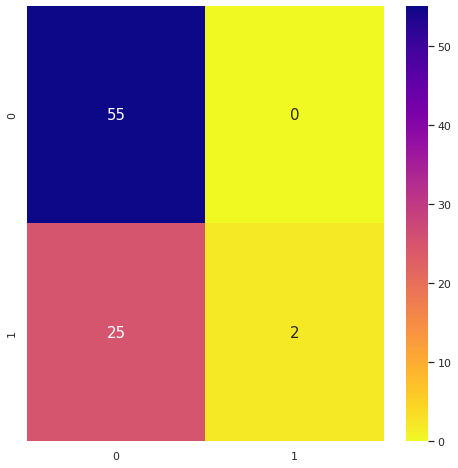

In [ ]:
plt.subplots(figsize=(8,8))
cf_matrix2 = confusion_matrix(Y_test,X_test_prediction )
sns.heatmap(cf_matrix2, annot = True, annot_kws = {'size':15}, cmap = 'plasma_r')

# *Decision* Tree

In [ ]:
from sklearn.model_selection import KFold
kfold_validation=KFold(10)
model3= DecisionTreeClassifier()

In [ ]:
#Training
model3.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
#Accuracy Score of training data for Decision Tree

X_train_prediction=model3.predict(X_train)
Training_data_Accuracy=accuracy_score(X_train_prediction, Y_train)
print('Accuracy of Training Data:',Training_data_Accuracy)

Accuracy of Training Data: 0.9978213507625272


In [ ]:
#Accuracy Score of testing data for Decision Tree

X_test_prediction=model3.predict(X_test)
Testing_data_Accuracy=accuracy_score(X_test_prediction, Y_test)
print('Accuracy of Testing Data:',Testing_data_Accuracy)

Accuracy of Testing Data: 0.926829268292683


In [ ]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(model3,X,Y,cv=kfold_validation)
print(results)
print('k fold val accuracy',np.mean(results))

[0.92727273 0.87037037 0.7962963  0.77777778 0.7962963  0.72222222
 0.92592593 0.90740741 0.61111111 0.74074074]
k fold val accuracy 0.8075420875420875


In [ ]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
scores=cross_val_score(model3,X_test,Y_test,cv=skfold)
print('Stratified k fold val accuracy',np.mean(scores))

Stratified k fold val accuracy 0.8632352941176471


In [ ]:
#Precision Score of training data for Decision Tree

X_train_prediction=model3.predict(X_train)
Training_data_Precision3a=precision_score(X_train_prediction, Y_train)
print('Precision of Training Data:',Training_data_Precision3a)

Precision of Training Data: 0.9933333333333333


In [ ]:
#Precision Score of testing data for Decision Tree

X_test_prediction=model3.predict(X_test)
Testing_data_Precision3b=precision_score(X_test_prediction, Y_test)
print('Precision of Testing Data:',Testing_data_Precision3b)

Precision of Testing Data: 0.8888888888888888


In [ ]:
#Recall_Score of training data for Decision Tree

X_train_prediction=model3.predict(X_train)
Training_data_recall=recall_score(X_train_prediction, Y_train)
print('Recall(sensitivity) of Training Data:',Training_data_recall)

Recall(sensitivity) of Training Data: 1.0


In [ ]:
#Recall_Score of testing data for Decision Tree

X_test_prediction=model3.predict(X_test)
Testing_data_recall=recall_score(X_test_prediction, Y_test)
print('Recall(sensitivity) of Testing Data:',Testing_data_recall)

Recall(sensitivity) of Testing Data: 0.8888888888888888


In [ ]:
#F1_Score of training data for Decision Tree

X_train_prediction=model3.predict(X_train)
Training_data_F1=f1_score(X_train_prediction, Y_train)
print('F1_score of Training Data:',Training_data_F1)

F1_score of Training Data: 0.9966555183946488


In [ ]:
#F1_Score of testing data for Decision Tree

X_test_prediction=model3.predict(X_test)
Testing_data_F1=f1_score(X_test_prediction, Y_test)
print('F1_score of Testing Data:',Testing_data_F1)

F1_score of Testing Data: 0.8888888888888888


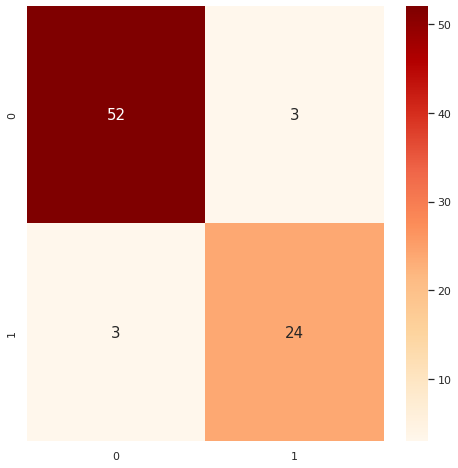

In [ ]:
plt.subplots(figsize=(8,8))
cf_matrix3 = confusion_matrix(Y_test,X_test_prediction )
sns.heatmap(cf_matrix3, annot = True, annot_kws = {'size':15}, cmap = 'OrRd')

# Random Forest classifier

In [ ]:
from sklearn.model_selection import KFold
kfold_validation=KFold(10)
model5=RandomForestClassifier()

In [ ]:
#Training
model5.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
#Accuracy Score of training data for random forest

X_train_prediction=model5.predict(X_train)
Training_data_Accuracy=accuracy_score(X_train_prediction, Y_train)
print('Accuracy of Training Data:',Training_data_Accuracy)

Accuracy of Training Data: 0.9978213507625272


In [ ]:
#Accuracy Score of testing data for random forest

X_test_prediction=model5.predict(X_test)
Testing_data_Accuracy=accuracy_score(X_test_prediction, Y_test)
print('Accuracy of Testing Data:',Testing_data_Accuracy)

Accuracy of Testing Data: 0.9390243902439024


K fold

In [ ]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(model5,X,Y,cv=kfold_validation)
print(results)
print('K fold Val accuracy',np.mean(results))

[0.92727273 0.92592593 0.81481481 0.88888889 0.88888889 0.7962963
 0.96296296 0.90740741 0.68518519 0.85185185]
K fold Val accuracy 0.8649494949494949


Stratified K Fold

In [ ]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
scores=cross_val_score(model5,X_test,Y_test,cv=skfold)
print('Stratified K fold accuracy',np.mean(scores))

Stratified K fold accuracy 0.8889705882352942


In [ ]:
#Precision Score of training data for RFC

X_train_prediction=model5.predict(X_train)
Training_data_Precision5a=precision_score(X_train_prediction, Y_train)
print('Precision of Training Data:',Training_data_Precision5a)

Precision of Training Data: 0.9933333333333333


In [ ]:
#Precision Score of testing data for RFC

X_test_prediction=model5.predict(X_test)
Testing_data_Precision5b=precision_score(X_test_prediction, Y_test)
print('Precision of Testing Data:',Testing_data_Precision5b)

Precision of Testing Data: 0.8518518518518519


In [ ]:
#Recall_Score of training data for RFC

X_train_prediction=model5.predict(X_train)
Training_data_recall=recall_score(X_train_prediction, Y_train)
print('Recall(sensitivity) of Training Data:',Training_data_recall)

Recall(sensitivity) of Training Data: 1.0


In [ ]:
#Recall_Score of testing data for RFC

X_test_prediction=model5.predict(X_test)
Testing_data_recall=recall_score(X_test_prediction, Y_test)
print('Recall(sensitivity) of Testing Data:',Testing_data_recall)

Recall(sensitivity) of Testing Data: 0.9583333333333334


In [ ]:
#F1_Score of training data for RFC

X_train_prediction=model5.predict(X_train)
Training_data_F1=f1_score(X_train_prediction, Y_train)
print('F1_score of Training Data:',Training_data_F1)

F1_score of Training Data: 0.9966555183946488


In [ ]:
#F1_Score of testing data for RFC

X_test_prediction=model5.predict(X_test)
Testing_data_F1=f1_score(X_test_prediction, Y_test)
print('F1_score of Testing Data:',Testing_data_F1)

F1_score of Testing Data: 0.9019607843137256


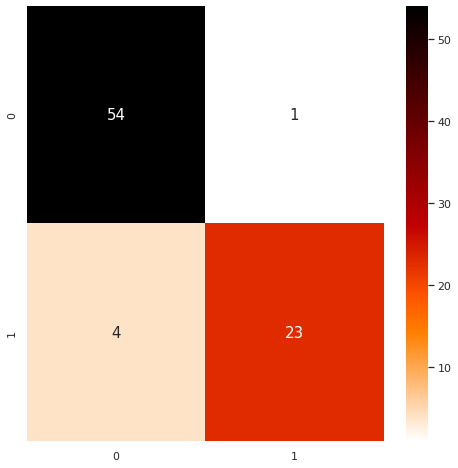

In [ ]:
plt.subplots(figsize=(8,8))
cf_matrix5 = confusion_matrix(Y_test,X_test_prediction )
sns.heatmap(cf_matrix5, annot = True, annot_kws = {'size':15}, cmap = 'gist_heat_r')

# Naive Bayes

In [ ]:
from sklearn.model_selection import KFold
kfold_validation=KFold(10)
model6 = BernoulliNB()

In [ ]:
model6.fit(X_train, Y_train)

BernoulliNB()

In [ ]:
#Accuracy Score of training data for Naive bayes

X_train_prediction=model6.predict(X_train)
Training_data_Accuracy=accuracy_score(X_train_prediction, Y_train)
print('Accuracy of Training Data:',Training_data_Accuracy)

Accuracy of Training Data: 0.7690631808278867


In [ ]:
#Accuracy Score of testing data for Naive bayes

X_test_prediction=model6.predict(X_test)
Testing_data_Accuracy=accuracy_score(X_test_prediction, Y_test)
print('Accuracy of Testing Data:',Testing_data_Accuracy)

Accuracy of Testing Data: 0.7560975609756098


Kfold Validation

In [ ]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(model6,X,Y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.90909091 0.88888889 0.66666667 0.68518519 0.83333333 0.72222222
 0.75925926 0.7037037  0.46296296 0.61111111]
0.7242424242424242


Stratified Kfold

In [ ]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
scores=cross_val_score(model5,X_test,Y_test,cv=skfold)
print(np.mean(scores))

0.8889705882352942


In [ ]:
X_train_prediction=model6.predict(X_train)
Training_data_Precision=precision_score(X_train_prediction, Y_train)
print('Precision of Training Data:',Training_data_Precision)

Precision of Training Data: 0.38666666666666666


In [ ]:
X_test_prediction=model6.predict(X_test)
Testing_data_Precision=precision_score(X_test_prediction, Y_test)
print('Precision of Testing Data:',Testing_data_Precision)

Precision of Testing Data: 0.4074074074074074


In [ ]:
#Recall_Score of training data for NB

X_train_prediction=model6.predict(X_train)
Training_data_recall=recall_score(X_train_prediction, Y_train)
print('Recall(sensitivity) of Training Data:',Training_data_recall)

Recall(sensitivity) of Training Data: 0.8055555555555556


In [ ]:
#Recall_Score of testing data for NB

X_test_prediction=model6.predict(X_test)
Testing_data_recall=recall_score(X_test_prediction, Y_test)
print('Recall(sensitivity) of Testing Data:',Testing_data_recall)

Recall(sensitivity) of Testing Data: 0.7333333333333333


In [ ]:
#F1_Score of training data for NB

X_train_prediction=model6.predict(X_train)
Training_data_F1=f1_score(X_train_prediction, Y_train)
print('F1_score of Training Data:',Training_data_F1)

F1_score of Training Data: 0.5225225225225225


In [ ]:
#F1_Score of testing data for NB

X_test_prediction=model6.predict(X_test)
Testing_data_F1=f1_score(X_test_prediction, Y_test)
print('F1_score of Testing Data:',Testing_data_F1)

F1_score of Testing Data: 0.5238095238095238


In [ ]:
#/np.sum(cf_matrix6),fmt='.2%',

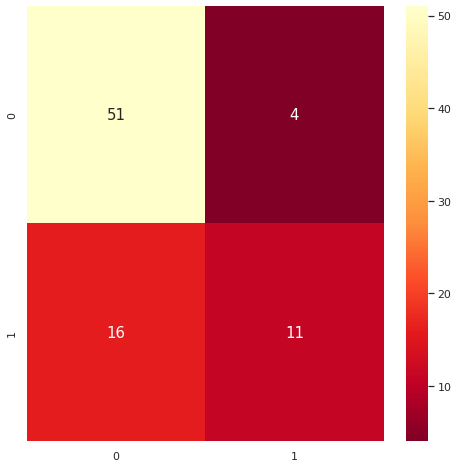

In [ ]:
#confusion matrix
plt.subplots(figsize=(8,8))
cf_matrix6 = confusion_matrix(Y_test,X_test_prediction )
sns.heatmap(cf_matrix6, annot = True, annot_kws = {'size':15}, cmap = 'YlOrRd_r')

# ROC Curve


Best Threshold Catboost =0.508028, G-Means=0.943
Best threshold catboost from Youdens J Statistic =0.508028
Best Threshold RFC=0.430000, G-Means=0.926
Best threshold RFC from Youdens J Statistic =0.430000


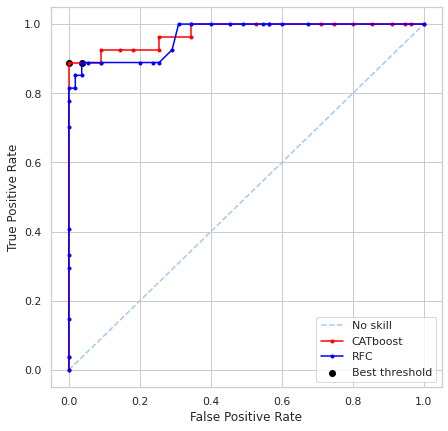

In [ ]:
from sklearn.metrics import roc_curve
from numpy import sqrt
from numpy import argmax


yhat1 = model_cb.predict_proba(X_test)
yhat1 = yhat1[:,1]
fpr1, tpr1, threshold1 = roc_curve(Y_test,yhat1)
gmeans1 = sqrt(tpr1*(1-fpr1))
ix1 = argmax(gmeans1)
j1 = tpr1-fpr1
ixj1 = argmax(j1)
btj1 = threshold1[ixj1]
print('Best Threshold Catboost =%f, G-Means=%.3f'%(threshold1[ix1], gmeans1[ix1]))
print('Best threshold catboost from Youdens J Statistic =%f'%(btj1))

yhat5 = model5.predict_proba(X_test)
yhat5 = yhat5[:,1]
fpr5, tpr5, threshold5 = roc_curve(Y_test,yhat5)
gmeans5 = sqrt(tpr5*(1-fpr5))
ix5 = argmax(gmeans5)
print('Best Threshold RFC=%f, G-Means=%.3f'%(threshold5[ix5], gmeans5[ix5]))
j5 = tpr5-fpr5
ixj5 = argmax(j5)
btj5 = threshold5[ixj5]
print('Best threshold RFC from Youdens J Statistic =%f'%(btj5))


plt.figure(figsize=(7,7))
plt.plot([0,1], [0,1], linestyle='--',label='No skill')

plt.plot(fpr1, tpr1, marker='.',color='red',label='CATboost')
plt.scatter(fpr1[ix1], tpr1[ix1], marker= 'o',color = 'black', label='Best threshold' )

plt.plot(fpr5, tpr5, marker='.',color='blue',label='RFC')
plt.scatter(fpr5[ix5], tpr5[ix5], marker='o',color = 'black')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Best Threshold Catboost =0.508028, G-Means=0.943
Best threshold catboost from Youdens J Statistic =0.508028
Best Threshold LG =0.487048, G-Means=0.750
Best threshold Log Reg from Youdens J Statistic =0.487048
Best Threshold DT =1.000000, G-Means=0.917
Best threshold DT from Youdens J Statistic =1.000000
Best Threshold RFC=0.430000, G-Means=0.926
Best threshold RFC from Youdens J Statistic =0.430000
Best Threshold Bernoulli=0.493160, G-Means=0.834
Best threshold Bernoulli from Youdens J Statistic =0.493160


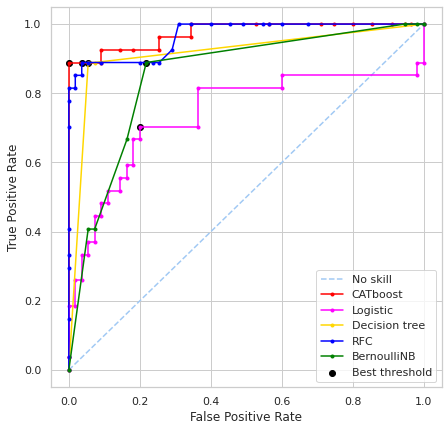

In [ ]:
from sklearn.metrics import roc_curve
from numpy import sqrt
from numpy import argmax



yhat1 = model_cb.predict_proba(X_test)
yhat1 = yhat1[:,1]
fpr1, tpr1, threshold1 = roc_curve(Y_test,yhat1)
gmeans1 = sqrt(tpr1*(1-fpr1))
ix1 = argmax(gmeans1)
j1 = tpr1-fpr1
ixj1 = argmax(j1)
btj1 = threshold1[ixj1]
print('Best Threshold Catboost =%f, G-Means=%.3f'%(threshold1[ix1], gmeans1[ix1]))
print('Best threshold catboost from Youdens J Statistic =%f'%(btj1))


yhat2 = model1.predict_proba(X_test)
yhat2 = yhat2[:,1]
fpr2, tpr2, threshold2 = roc_curve(Y_test,yhat2)
gmeans2 = sqrt(tpr2*(1-fpr2))
ix2 = argmax(gmeans2)
print('Best Threshold LG =%f, G-Means=%.3f'%(threshold2[ix2], gmeans2[ix2]))
j2 = tpr2-fpr2
ixj2 = argmax(j2)
btj2 = threshold2[ixj2]
print('Best threshold Log Reg from Youdens J Statistic =%f'%(btj2))



'''yhat3 = model2.predict_proba(X_test)
yhat3 = yhat3[:,1]
fpr3, tpr3, threshold3 = roc_curve(Y_test,yhat3)
gmeans3 = sqrt(tpr3*(1-fpr3))
ix3 = argmax(gmeans3)
print('Best Threshold KNN =%f, G-Means=%.3f'%(threshold3[ix3], gmeans3[ix3]))
j3 = tpr3-fpr3
ixj3 = argmax(j3)
btj3 = threshold3[ixj3]
print('Best threshold KNN from Youdens J Statistic =%f'%(btj3))'''




yhat4 = model3.predict_proba(X_test)
yhat4 = yhat4[:,1]
fpr4, tpr4, threshold4 = roc_curve(Y_test,yhat4)
gmeans4 = sqrt(tpr4*(1-fpr4))
ix4 = argmax(gmeans4)
print('Best Threshold DT =%f, G-Means=%.3f'%(threshold4[ix4], gmeans4[ix4]))
j4 = tpr4-fpr4
ixj4 = argmax(j4)
btj4 = threshold4[ixj4]
print('Best threshold DT from Youdens J Statistic =%f'%(btj4))





yhat5 = model5.predict_proba(X_test)
yhat5 = yhat5[:,1]
fpr5, tpr5, threshold5 = roc_curve(Y_test,yhat5)
gmeans5 = sqrt(tpr5*(1-fpr5))
ix5 = argmax(gmeans5)
print('Best Threshold RFC=%f, G-Means=%.3f'%(threshold5[ix5], gmeans5[ix5]))
j5 = tpr5-fpr5
ixj5 = argmax(j5)
btj5 = threshold5[ixj5]
print('Best threshold RFC from Youdens J Statistic =%f'%(btj5))




yhat6 = model6.predict_proba(X_test)
yhat6 = yhat6[:,1]
fpr6, tpr6, threshold6 = roc_curve(Y_test,yhat6)
gmeans6 = sqrt(tpr6*(1-fpr6))
ix6 = argmax(gmeans6)
print('Best Threshold Bernoulli=%f, G-Means=%.3f'%(threshold6[ix6], gmeans6[ix6]))
j6 = tpr6-fpr6
ixj6 = argmax(j6)
btj6 = threshold6[ixj6]
print('Best threshold Bernoulli from Youdens J Statistic =%f'%(btj6))



plt.figure(figsize=(7,7))
plt.plot([0,1], [0,1], linestyle='--',label='No skill')
plt.plot(fpr1, tpr1, marker='.',color='red',label='CATboost')
plt.scatter(fpr1[ix1], tpr1[ix1], marker= 'o',color = 'black', label='Best threshold')

plt.plot(fpr2, tpr2, marker='.',color='magenta',label='Logistic')
plt.scatter(fpr2[ix2], tpr2[ix2], marker='o',color = 'black')

'''plt.plot(fpr3, tpr3, marker='.',color='red',label='KNN')
plt.scatter(fpr3[ix3], tpr3[ix3], marker='o',color = 'black')'''

plt.plot(fpr4, tpr4, marker='.',color='gold',label='Decision tree')
plt.scatter(fpr4[ix4], tpr4[ix4], marker='o',color = 'black')

plt.plot(fpr5, tpr5, marker='.',color='blue',label='RFC')
plt.scatter(fpr5[ix5], tpr5[ix5], marker='o',color = 'black')

plt.plot(fpr6, tpr6, marker='.',color='green',label='BernoulliNB')
plt.scatter(fpr6[ix6], tpr6[ix6], marker='o',color =  'black')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [ ]:
print(tpr1)

[0.         0.03703704 0.88888889 0.88888889 0.92592593 0.92592593
 0.92592593 0.92592593 0.96296296 0.96296296 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]


In [ ]:
print(fpr1)

[0.         0.         0.         0.09090909 0.09090909 0.14545455
 0.18181818 0.25454545 0.25454545 0.34545455 0.34545455 0.52727273
 0.56363636 0.70909091 0.74545455 0.8        0.85454545 0.90909091
 0.94545455 0.96363636 1.        ]


In [ ]:
print(tpr5)

[0.         0.03703704 0.14814815 0.2962963  0.33333333 0.40740741
 0.7037037  0.77777778 0.81481481 0.81481481 0.85185185 0.85185185
 0.88888889 0.88888889 0.88888889 0.88888889 0.88888889 0.88888889
 0.92592593 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ]


In [ ]:
print(fpr5)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.01818182 0.01818182 0.03636364
 0.03636364 0.05454545 0.09090909 0.2        0.23636364 0.25454545
 0.29090909 0.30909091 0.34545455 0.4        0.45454545 0.49090909
 0.54545455 0.56363636 0.6        0.67272727 1.        ]


In [ ]:
from sklearn.metrics import roc_auc_score

#AUC score
auc_score1=roc_auc_score(Y_test, yhat1)
auc_score2=roc_auc_score(Y_test, yhat2)
#auc_score3=roc_auc_score(Y_test, yhat3)
auc_score4=roc_auc_score(Y_test, yhat4)
auc_score5=roc_auc_score(Y_test, yhat5)
auc_score6=roc_auc_score(Y_test, yhat6)

print(auc_score1, auc_score2,  auc_score4, auc_score5, auc_score6)

0.9744107744107744 0.7387205387205388 0.9161616161616162 0.9656565656565657 0.8511784511784511


1) 31,50,157,15,72,20,10.8,2,4,1.5,1,0,160.77,10,7.08,4.09,39,0.820512821,2.24,4.5,21.38,64.2,0.57,107,1,0,1,0,1,1,1,120,80,6,11,12,11,6

0) 25,64,156,11,70,18,11.2,2,6,6,0,0,1.99,1.99,2.82,1.3,39,0.871794872,1.86,2.85,33.62,17.1,0.4,91,0,0,0,0,0,0,0,110,80,1,2,18,19,5.7,

In [ ]:
#PCOS YES
#1 PREDICTION 11 features
#494.08,494.08,5.54,0.88,6.295454545,6.63,49.7,0,0,13,15
#1214.23,1214.23,2,1.51,1.3245033,7.94,31.4,1,1,7,15
#23.58,1.99,1.89,0.81,2.3333333,2.07,28,1,1,16,8
#1.99,1.99,6.18,2.78,2.2230215,3.84,25.14,1,1,21,20
#1.99,1.99,3.99,4.3,0.9279069,20,17.4,1,1,9,10

In [ ]:
#PCOS NO
#0 prediction 11 FEATURES
#1.99,1.99,7.95,3.68,2.160326087,2.07,17.1,0,0,3,3
#60.8,1.99,6.73,1.09,6.1743119,1.53,61.3,0,0,3,5
#801.45,801.45,3.98,0.9,4.4222222,2.26,43.8,0,0,3,4
#237.97,1.99,3.24,1.07,3.028037,6.74,52.4,0,0,9,6

Building Predictive System

In [ ]:
input_data=(1214.23,1214.23,2,1.51,1.3245033,7.94,31.4,1,1,7,15)
#change input to numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model_cb.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('you do not have PCOS')
else:
    print('seek medical help, you have PCOS')

[1]
seek medical help, you have PCOS
